# GeoThermalCloud: Geothermal Machine Learning Analysis: Utah

This notebook is a part of the GeoThermalCloud.jl: Machine Learning Framework for Geothermal Exploration.

<div style="text-align: left; padding-bottom: 30px;">
    <img src="https://raw.githubusercontent.com/SmartTensors/GeoThermalCloud.jl/master/logos/geothermalcloud-small.jpg" alt="geothermalcloud" width=25%  max-width=125px;/>
</div>

## GeoThermalCloud installation

If **GeoThermalCloud** is not installed, first execute in the Julia REPL: 

```julia
import Pkg
Pkg.add("GeoThermalCloud")
Pkg.add("NMFk")
Pkg.add("Mads")
Pkg.add("DelimitedFiles")
Pkg.add("JLD")
Pkg.add("Gadfly")
Pkg.add("Cairo")
Pkg.add("Fontconfig")
Pkg.add("Kriging")
Pkg.add("GMT")
Pkg.add("Images")
```

In [1]:
import GeoThermalCloud
import NMFk
import Mads
import DelimitedFiles
import JLD
import Gadfly
import Cairo
import Fontconfig
import Kriging
import GMT
import Images

## Load data

In [2]:
Xdat, headers = DelimitedFiles.readdlm("utah/data/utah_geothermal_data.csv", ',', header=true);

Set coordinates:

In [3]:
xcoord = Array{Float32}(Xdat[:, 2])
ycoord = Array{Float32}(Xdat[:, 1]);

## Data Locations

Plot data locations on a map:

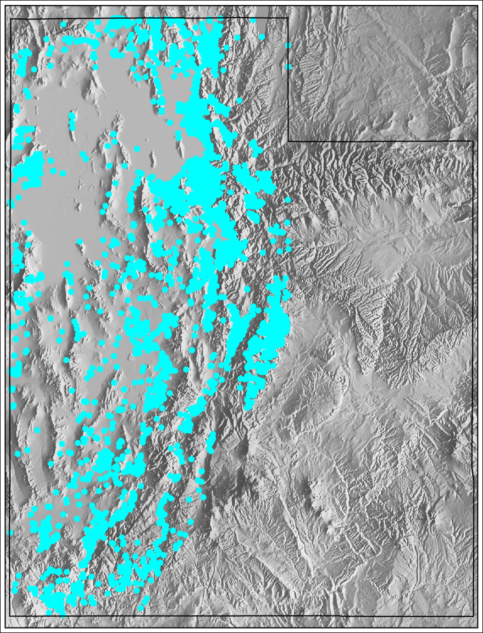

In [4]:
GMT.grdimage("utah/maps/utah.nc", proj=:Mercator, shade=(azimuth=100, norm="e0.8"),
	color=GMT.makecpt(color=:grayC, transparency=10, range=(0,5000,500), continuous=true),
	figsize=8, conf=(MAP_FRAME_TYPE="plain", MAP_GRID_PEN_PRIMARY="thinnest,gray,.",
	MAP_GRID_CROSS_SIZE_SECONDARY=0.1, MAP_FRAME_PEN=0.5, MAP_TICK_PEN_PRIMARY=0.1,
	MAP_TICK_LENGTH_PRIMARY=0.01), frame=(axis="lrtb"))
GMT.plot!(xcoord, ycoord, fill=:cyan, marker=:c, markersize=0.1, coast=(proj=:Mercator, 
    DCW=(country="US.UT", pen=(0.5,:black))),
    fmt=:png, savefig="utah/maps/locations");
Images.load("utah/maps/locations.png")

## Define data attributes

We can use attribute names from the header in the input file. 

However, the names are short.

For better understanding the variable names in the plots generated bellow, we are defining `short` and `long` attribute names:

In [5]:
attributes = ["Temperature", "Quartz", "Chalcedony", "pH", "TDS", "Al", "B", "Ba", "Be", "Br", "Ca", "Cl", "HCO3", "K", "Li", "Mg", "Na", "δO18"]
attributes_long = ["Temperature (C)", "GTM quartz (C)", "GTM chalcedony (C)", "pH ()", "TDS (ppm)", "Al (ppm)", "B (ppm)", "Ba (ppm)", "Be (ppm)", "Br (ppm)", "Ca (ppm)", "Cl (ppm)", "HCO3 (ppm)", "K (ppm)", "Li (ppm)", "Mg (ppm)", "Na (ppm)", "δO18 (‰)"];

## Pre-processing

Set empty data entries to `NaN`:

In [6]:
Xdat[Xdat .== ""] .= NaN;

Convert to `Float32`:

In [7]:
X = convert.(Float32, Xdat[:,3:end]);

Rescale δO18 data (‰):

In [8]:
X[:,18] .+= 20;

Set variables for the number of attributes and points:

In [9]:
nattributes = length(attributes_long)
npoints = size(Xdat, 1)

5218

Plot histograms and compute data statistics:

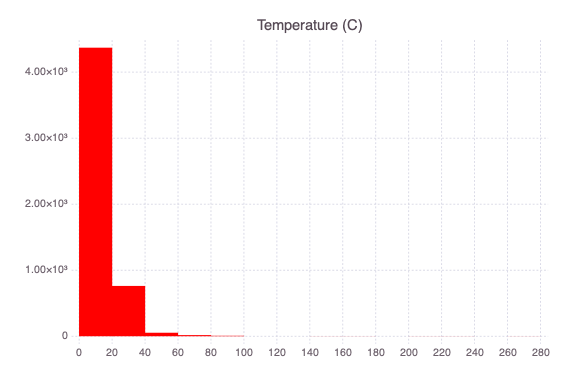

┌ Info: Temperature (C)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


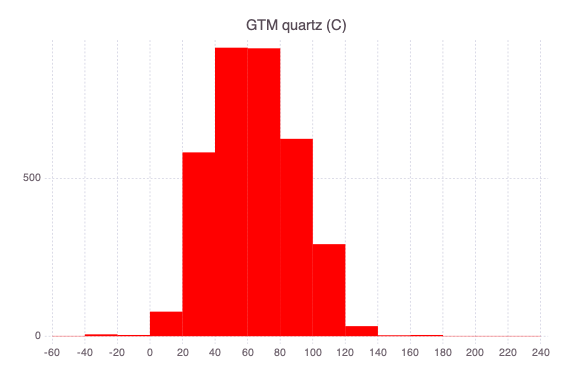

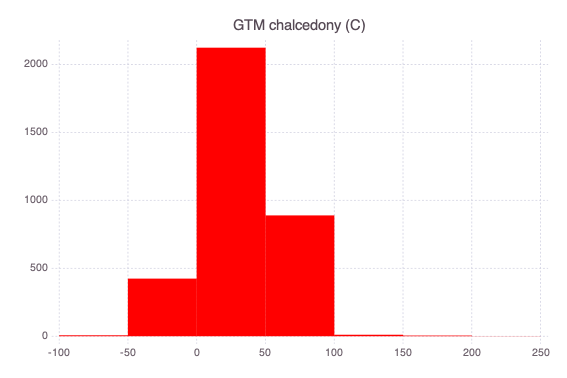

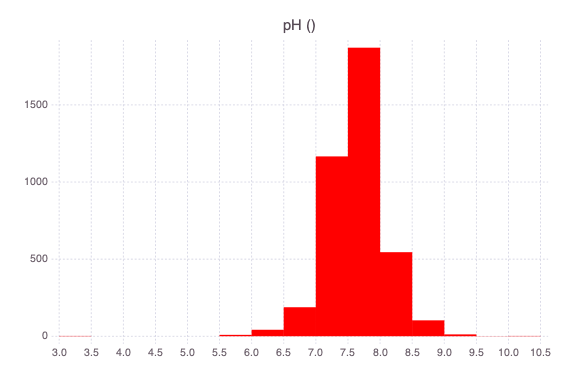

Temperature (C): Min 0.1 Max 261.0 StdDev 9.497179 Skewness 10.095466 Count 5214
GTM quartz (C): Min -50.870045 Max 222.28357 StdDev 26.329222 Skewness 0.24256101 Count 3460
GTM chalcedony (C): Min -81.64773 Max 208.67426 StdDev 27.450817 Skewness 0.3369881 Count 3460


┌ Info: GTM quartz (C)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: GTM chalcedony (C)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: pH ()
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


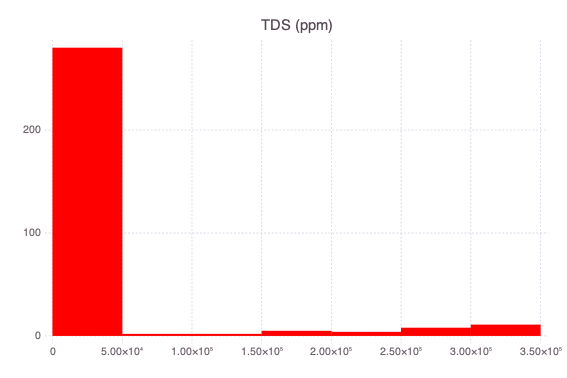

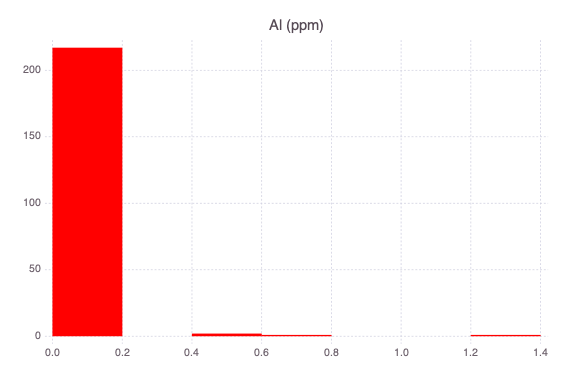

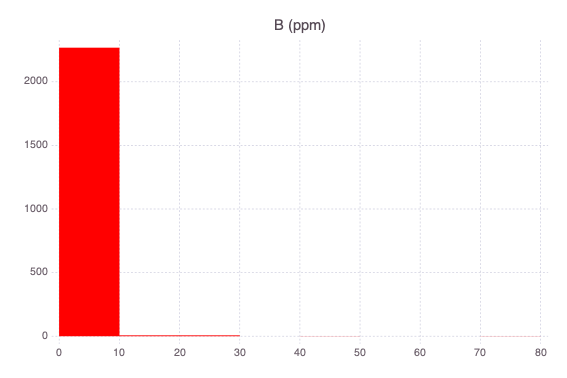

pH (): Min 3.4 Max 10.2 StdDev 0.44822767 Skewness -0.45681924 Count 3941
TDS (ppm): Min 122.0 Max 329000.0 StdDev 78777.95 Skewness 2.9479313 Count 312
Al (ppm): Min 0.0 Max 1.251 StdDev 0.10527698 Skewness 9.031239 Count 221


┌ Info: TDS (ppm)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: Al (ppm)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: B (ppm)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


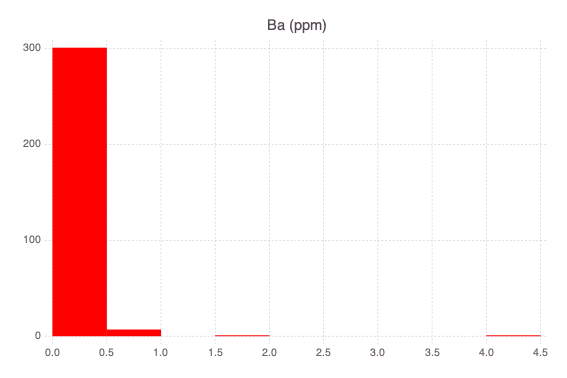

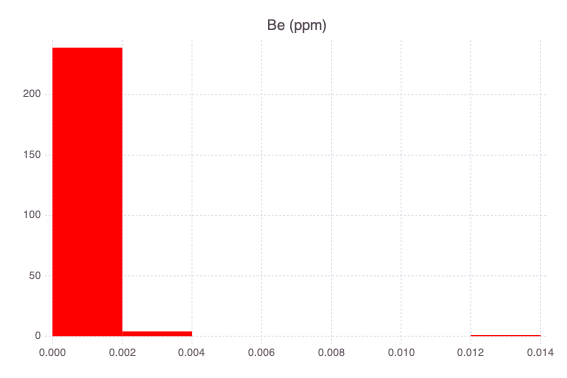

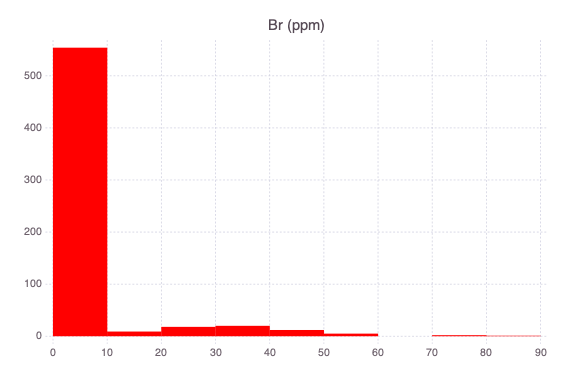

B (ppm): Min 0.0 Max 76.5 StdDev 2.6950865 Skewness 15.190172 Count 2284
Ba (ppm): Min 0.002 Max 4.5 StdDev 0.2898333 Skewness 11.825817 Count 310
Be (ppm): Min 5.3333333e-5 Max 0.013 StdDev 0.00089295243 Skewness 10.968073 Count 244


┌ Info: Ba (ppm)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: Be (ppm)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: Br (ppm)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


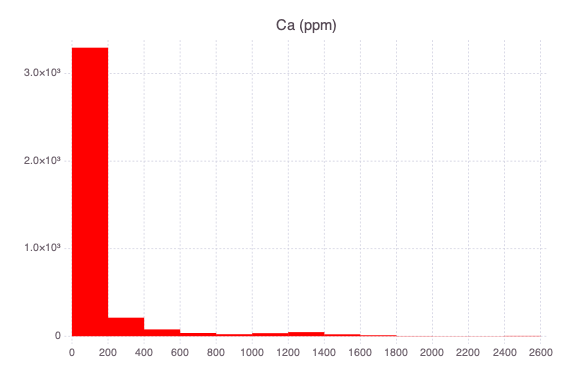

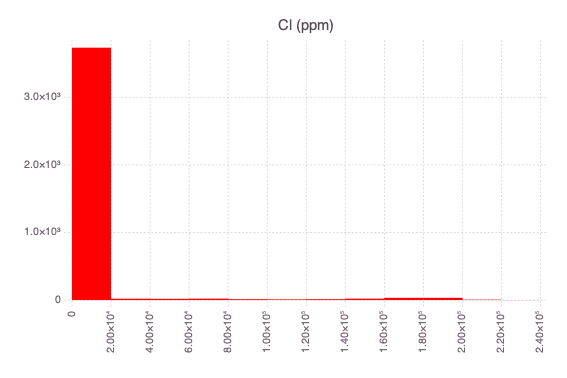

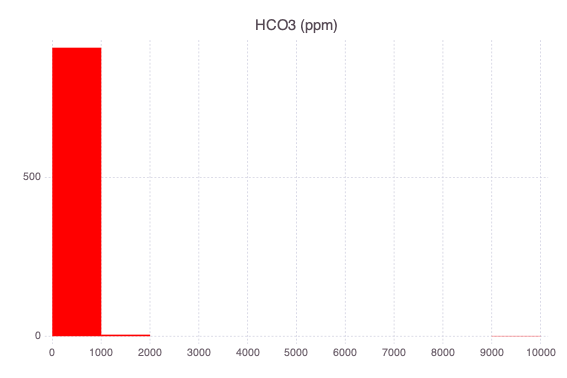

Br (ppm): Min 0.0 Max 84.0 StdDev 11.680384 Skewness 3.435088 Count 621
Ca (ppm): Min 0.6 Max 2566.6667 StdDev 262.82578 Skewness 4.424904 Count 3772
Cl (ppm): Min 0.6 Max 240000.0 StdDev 28681.555 Skewness 5.21565 Count 3923


┌ Info: Ca (ppm)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: Cl (ppm)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: HCO3 (ppm)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


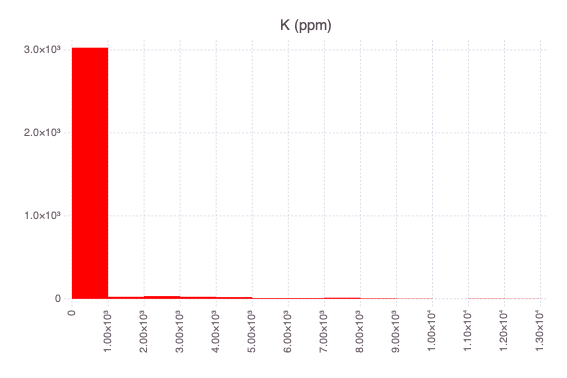

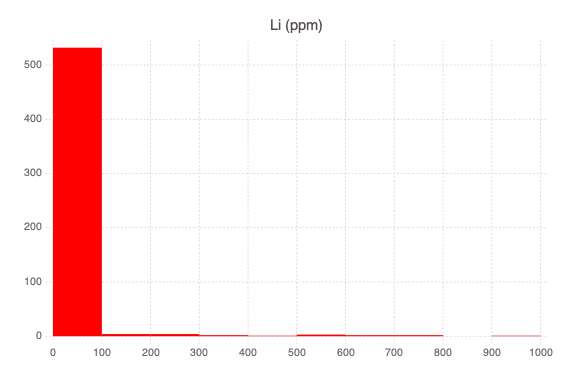

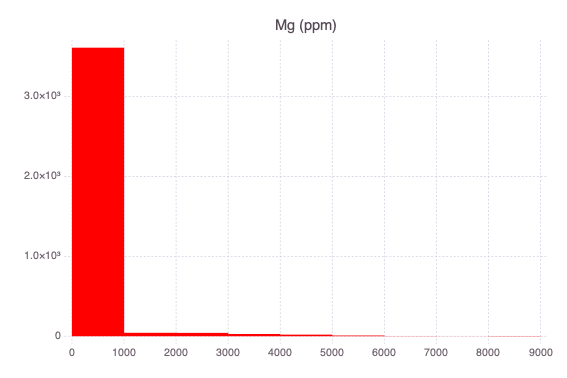

HCO3 (ppm): Min 37.0 Max 9217.0 StdDev 329.8163 Skewness 22.165213 Count 915
K (ppm): Min 0.0 Max 13000.0 StdDev 1063.7937 Skewness 6.380783 Count 3177
Li (ppm): Min 0.0 Max 970.0 StdDev 90.79041 Skewness 6.6990304 Count 551


┌ Info: K (ppm)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: Li (ppm)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: Mg (ppm)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


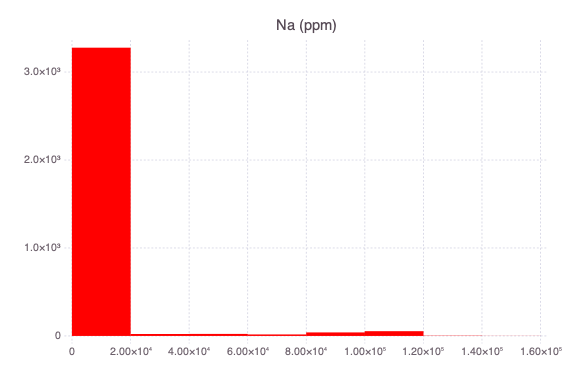

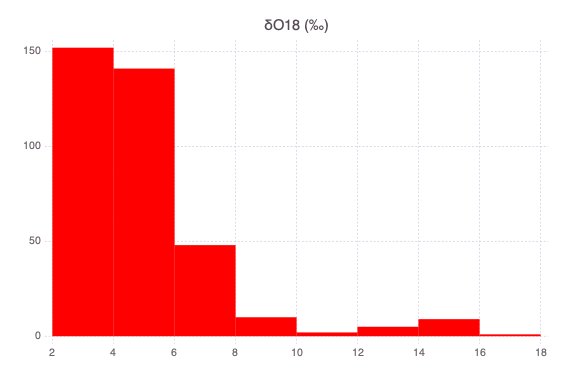

Mg (ppm): Min 0.0 Max 8500.0 StdDev 663.7361 Skewness 6.581147 Count 3760
Na (ppm): Min 0.5 Max 160000.0 StdDev 17983.25 Skewness 4.946034 Count 3437


┌ Info: Na (ppm)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: δO18 (‰)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


δO18 (‰): Min 2.1499996 Max 16.36 StdDev 2.4535506 Skewness 2.5710073 Count 368
Name Min Max StdDev Count (non-NaN's)
Temperature (C) 0.1 261.0 9.497179 10.095466 5214
GTM quartz (C) -50.870045 222.28357 26.329222 0.24256101 3460
GTM chalcedony (C) -81.64773 208.67426 27.450817 0.3369881 3460
pH () 3.4 10.2 0.44822767 -0.45681924 3941
TDS (ppm) 122.0 329000.0 78777.95 2.9479313 312
Al (ppm) 0.0 1.251 0.10527698 9.031239 221
B (ppm) 0.0 76.5 2.6950865 15.190172 2284
Ba (ppm) 0.002 4.5 0.2898333 11.825817 310
Be (ppm) 5.3333333e-5 0.013 0.00089295243 10.968073 244
Br (ppm) 0.0 84.0 11.680384 3.435088 621
Ca (ppm) 0.6 2566.6667 262.82578 4.424904 3772
Cl (ppm) 0.6 240000.0 28681.555 5.21565 3923
HCO3 (ppm) 37.0 9217.0 329.8163 22.165213 915
K (ppm) 0.0 13000.0 1063.7937 6.380783 3177
Li (ppm) 0.0 970.0 90.79041 6.6990304 551
Mg (ppm) 0.0 8500.0 663.7361 6.581147 3760
Na (ppm) 0.5 160000.0 17983.25 4.946034 3437
δO18 (‰) 2.1499996 16.36 2.4535506 2.5710073 368


┌ Info: Attributes
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:70


In [10]:
NMFk.datanalytics(X, attributes_long; dims=2);

Note that the data entries for `TDS`, `Al`, and `δO18` are heavily missing.

Even though the dataset is very sparse, our ML methods can analyze the inputs.

Most of the commonly used ML methods cannot process datasets that are sparse.

Furthermore, different attributes in the Great Basin dataset cover different areas.

This is demonstrated in the maps generated below.

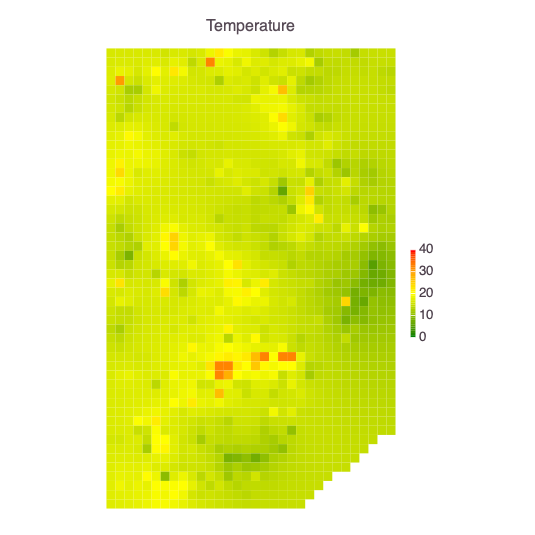

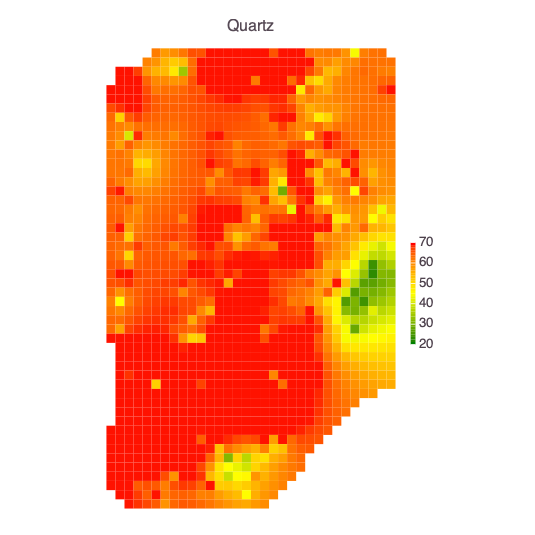

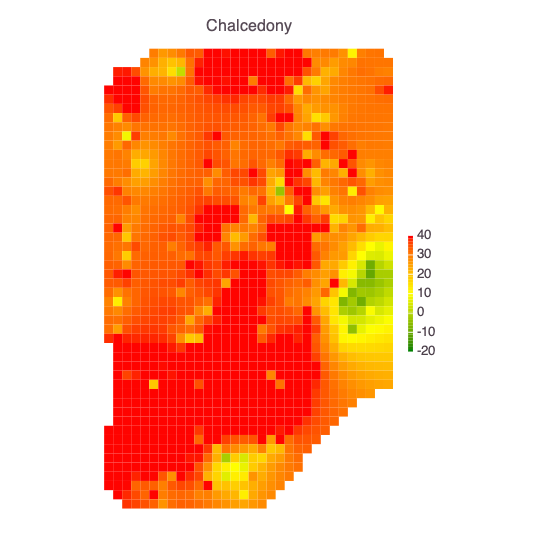

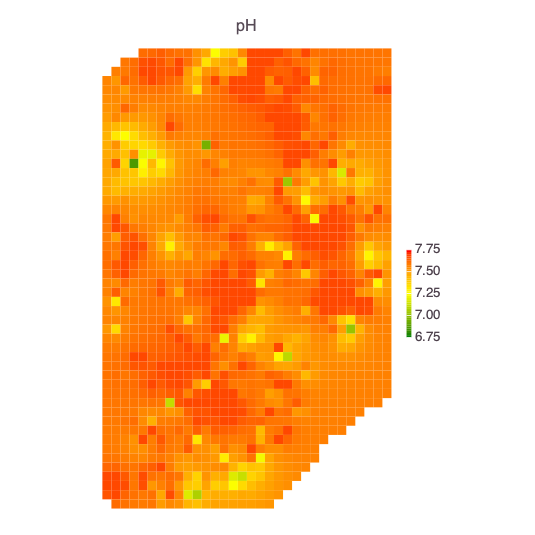

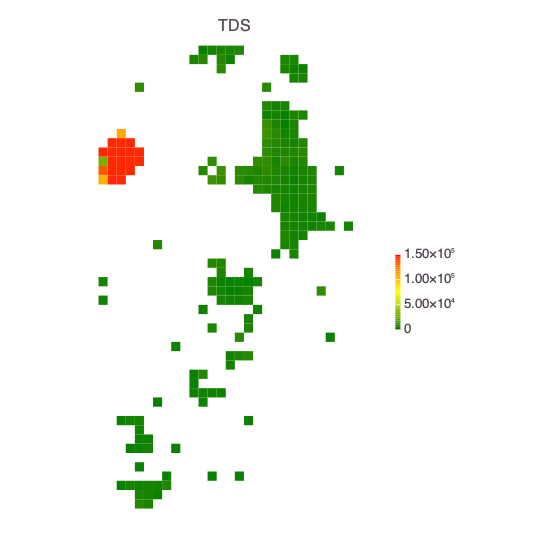

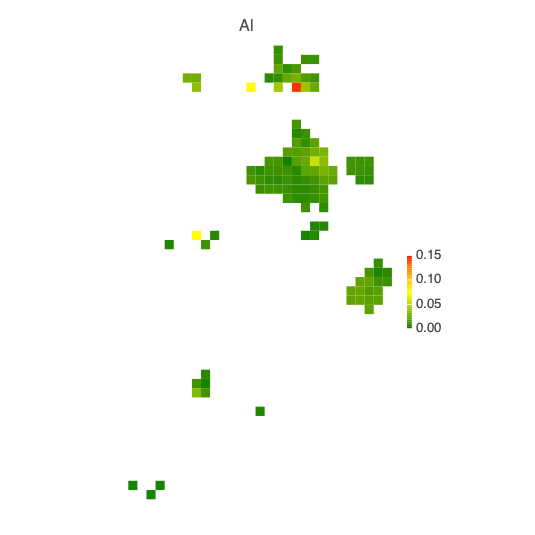

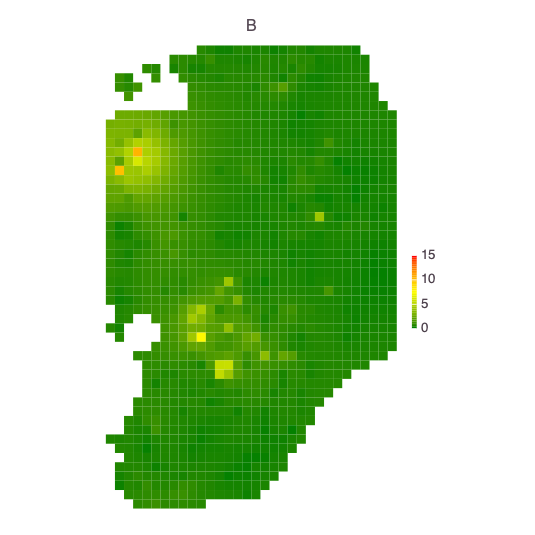

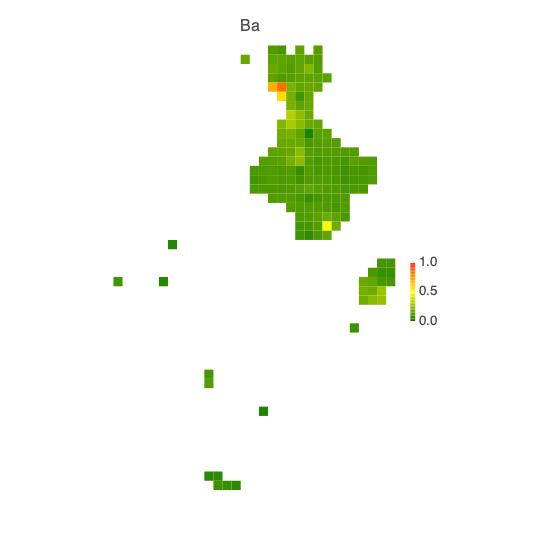

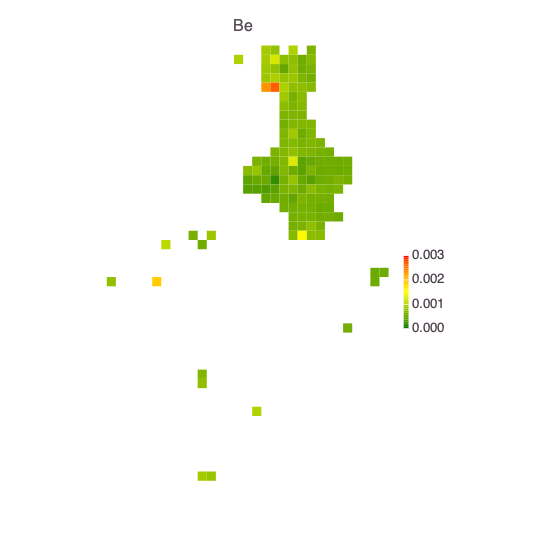

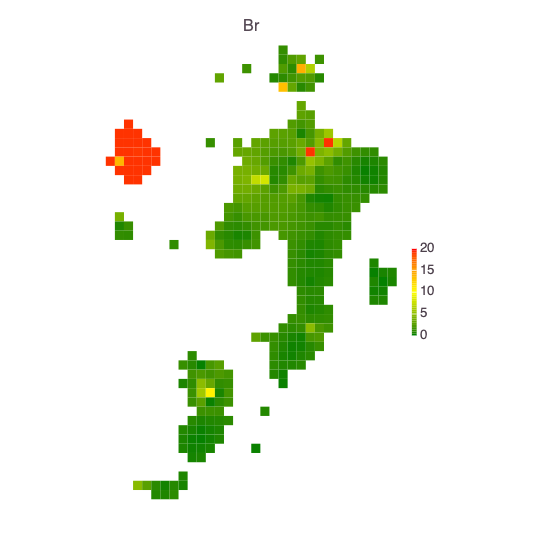

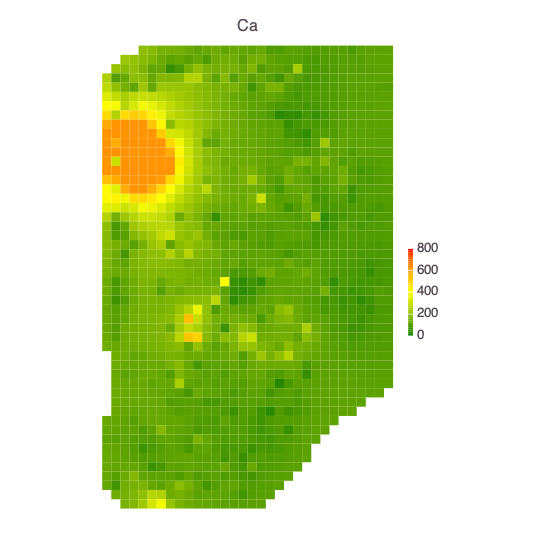

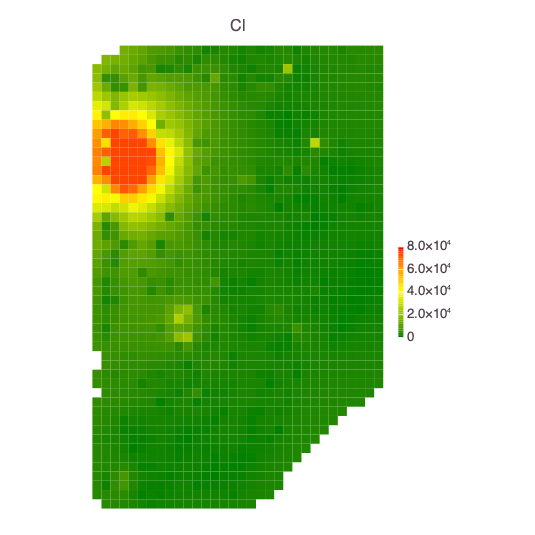

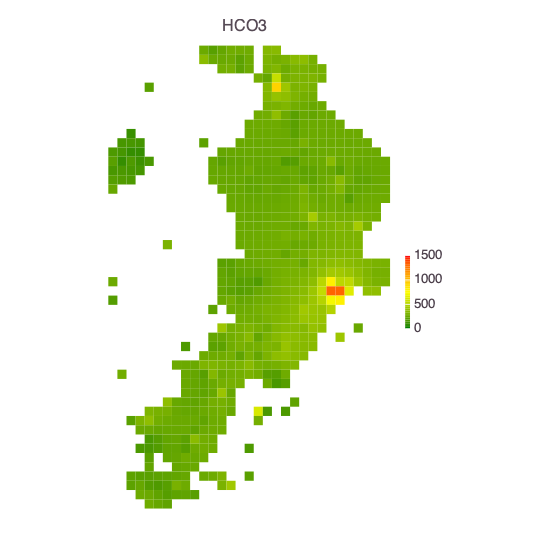

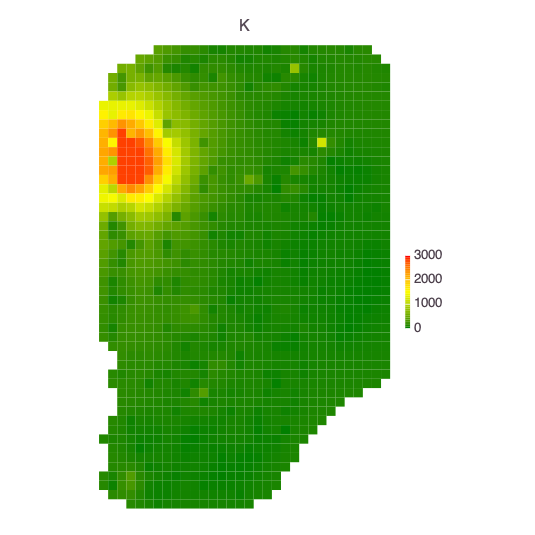

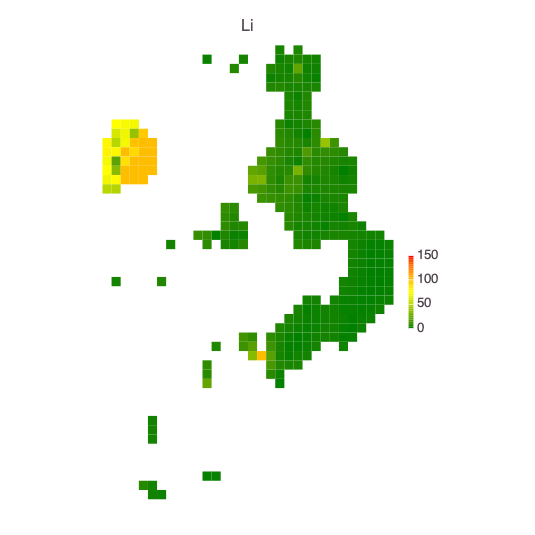

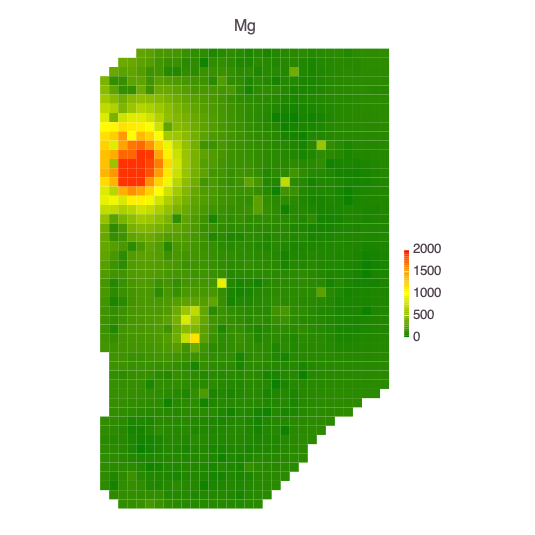

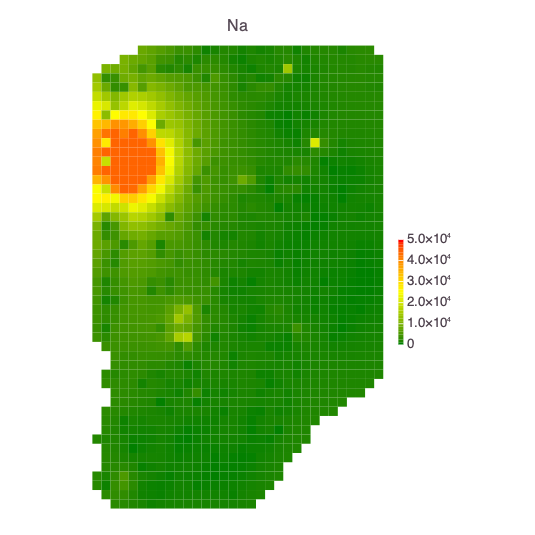

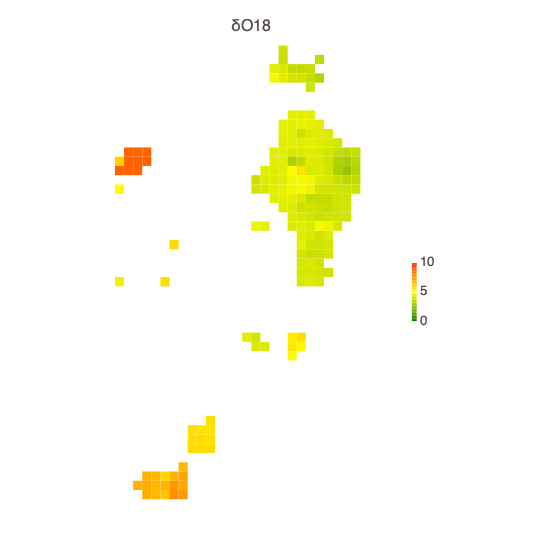

In [11]:
coord = permutedims([xcoord ycoord])

xgrid, ygrid = NMFk.griddata(xcoord, ycoord; stepvalue=0.1)

for i = 1:nattributes
	inversedistancefield = Array{Float64}(undef, length(xgrid), length(ygrid))
	v = X[:,i]
	iz = .!isnan.(v)
	icoord = coord[:,iz]
	v = v[iz]
	for (i, x) in enumerate(xgrid), (j, y) in enumerate(ygrid)
		inversedistancefield[i, j] = Kriging.inversedistance(permutedims([x y]), icoord, v, 2; cutoff=1000)[1]
	end
	imax = NMFk.maximumnan(inversedistancefield)
	imin = NMFk.minimumnan(inversedistancefield)
	NMFk.plotmatrix(rotl90(inversedistancefield); quiet=false, filename="utah/maps/Attribute_$(attributes[i])_map_inversedistance.png", title="$(attributes[i])", maxvalue=imin + (imax - imin)/ 2)
end

## Log-transformation

Attribute values are log-transformed to better capture the order of magnitude variability.

All attributes except for `Quartz`, `Chalcedony` and `pH` are log-transformed (`Quartz` and `Chalcedony` have negative values).

In [12]:
logv = [true, false, false, false,  true, true, true, true, true, true, true, true, true, true, true, true, true, true]
[attributes logv]

18×2 Matrix{Any}:
 "Temperature"   true
 "Quartz"       false
 "Chalcedony"   false
 "pH"           false
 "TDS"           true
 "Al"            true
 "B"             true
 "Ba"            true
 "Be"            true
 "Br"            true
 "Ca"            true
 "Cl"            true
 "HCO3"          true
 "K"             true
 "Li"            true
 "Mg"            true
 "Na"            true
 "δO18"          true

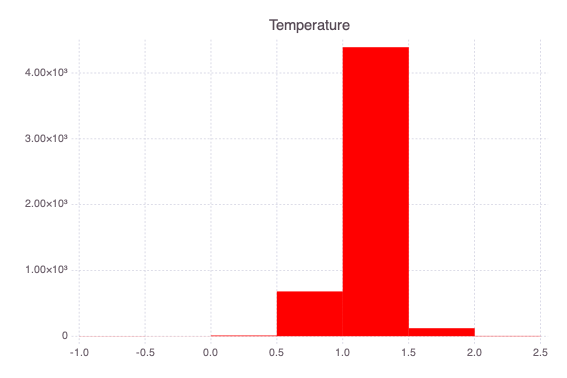

┌ Info: Temperature: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


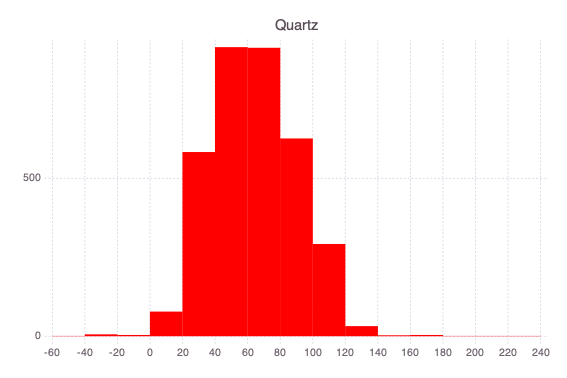

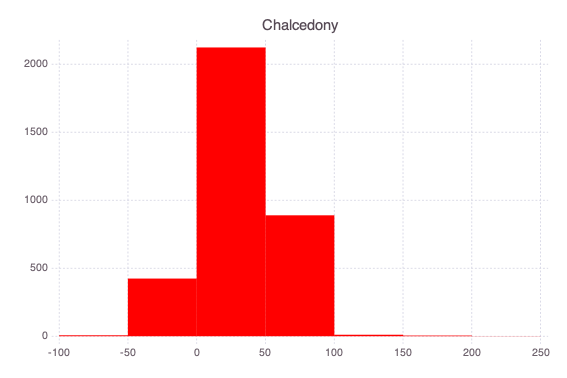

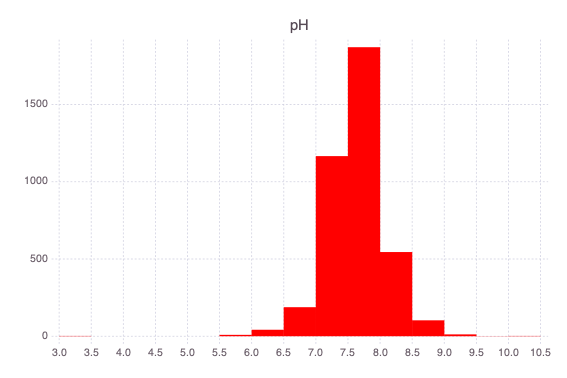

Temperature: Min -1.0 Max 2.4166405 StdDev 0.19028741 Skewness -0.5570712 Count 5214
Quartz: Min -50.870045 Max 222.28357 StdDev 26.329222 Skewness 0.24256101 Count 3460
Chalcedony: Min -81.64773 Max 208.67426 StdDev 27.450817 Skewness 0.3369881 Count 3460


┌ Info: Quartz
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: Chalcedony
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54
┌ Info: pH
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:54


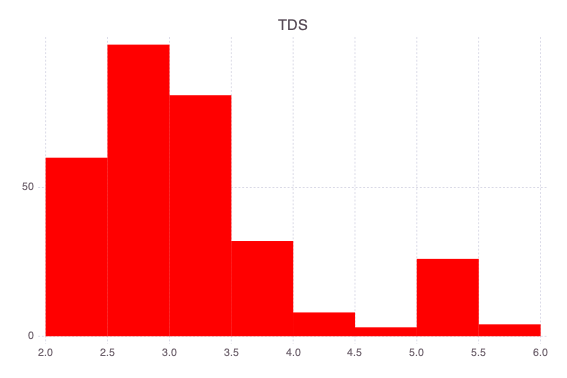

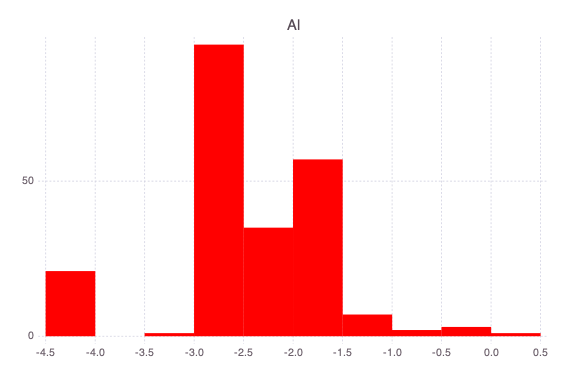

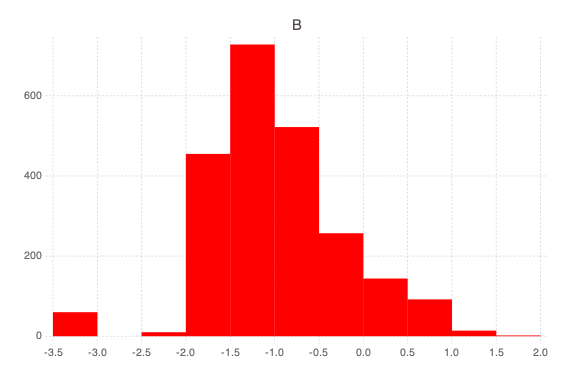

pH: Min 3.4 Max 10.2 StdDev 0.44822767 Skewness -0.45681924 Count 3941
TDS: Min 2.0863597 Max 5.5171957 StdDev 0.8672777 Skewness 1.4807001 Count 312
Al: Min -4.3979397 Max 0.09725732 StdDev 0.8454361 Skewness -0.37494856 Count 221


┌ Info: TDS: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51
┌ Info: Al: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51
┌ Info: B: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


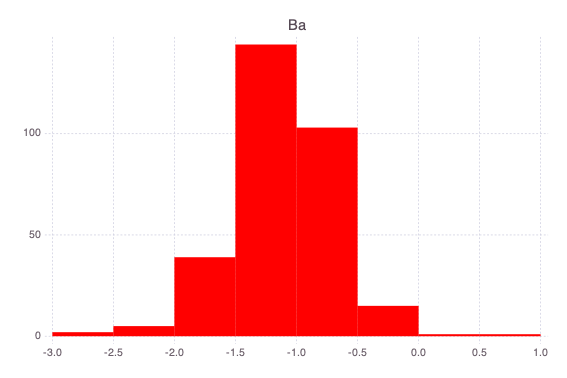

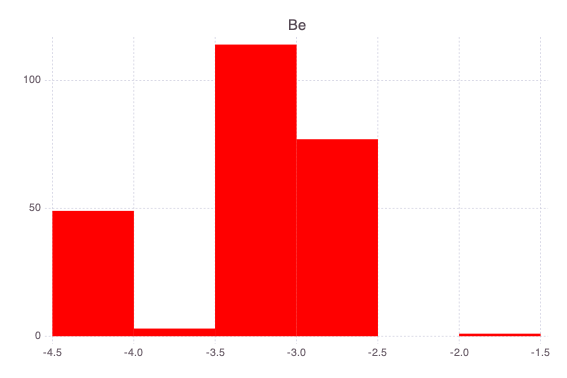

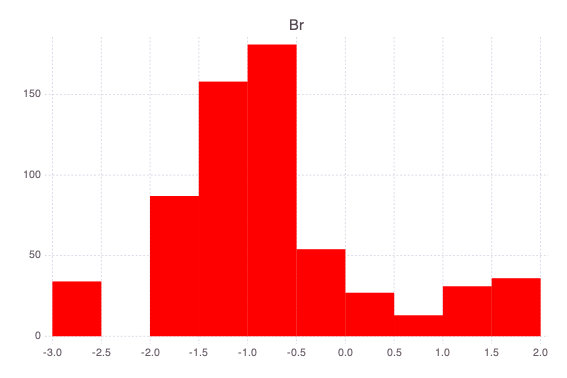

B: Min -3.30103 Max 1.8836614 StdDev 0.77384454 Skewness 0.08153698 Count 2284
Ba: Min -2.69897 Max 0.6532125 StdDev 0.40884706 Skewness -0.013896148 Count 310
Be: Min -4.273001 Max -1.8860567 StdDev 0.46150032 Skewness -0.83869493 Count 244


┌ Info: Ba: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51
┌ Info: Be: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51
┌ Info: Br: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


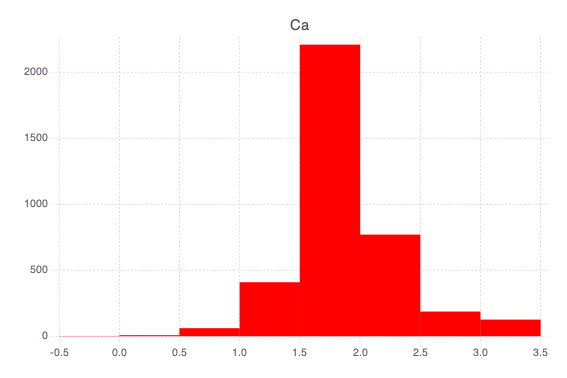

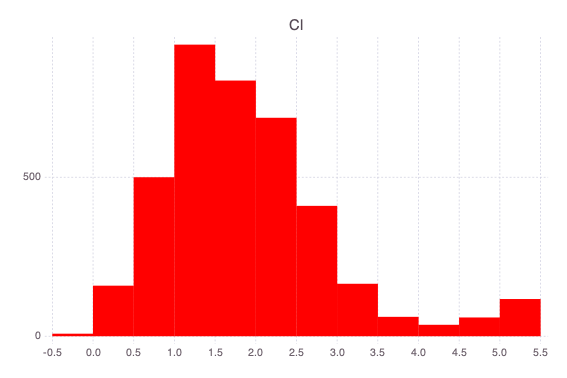

Br: Min -3.0 Max 1.9242793 StdDev 1.0616237 Skewness 0.5956521 Count 621
Ca: Min -0.22184873 Max 3.4093695 StdDev 0.43120933 Skewness 0.5738154 Count 3772


┌ Info: Ca: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51
┌ Info: Cl: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


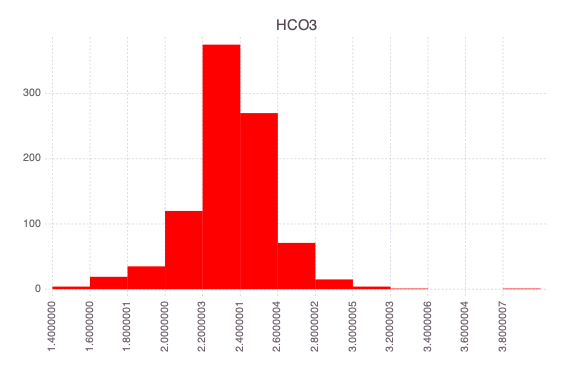

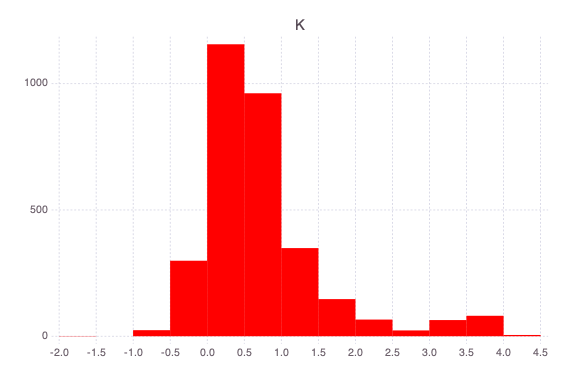

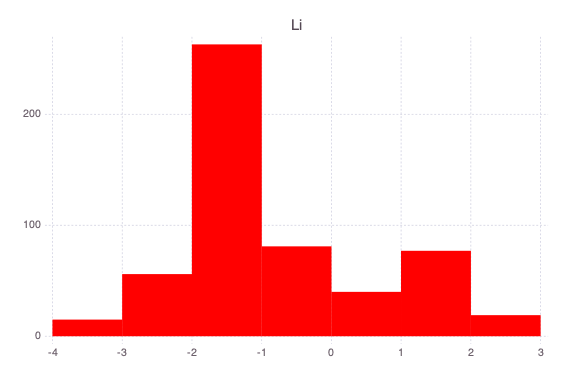

Cl: Min -0.22184873 Max 5.3802114 StdDev 1.0519629 Skewness 1.1927316 Count 3923
HCO3: Min 1.5682018 Max 3.9645896 StdDev 0.22752158 Skewness 0.051133487 Count 915
K: Min -2.0 Max 4.1139436 StdDev 0.8480291 Skewness 1.8444492 Count 3177


┌ Info: HCO3: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51
┌ Info: K: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51
┌ Info: Li: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


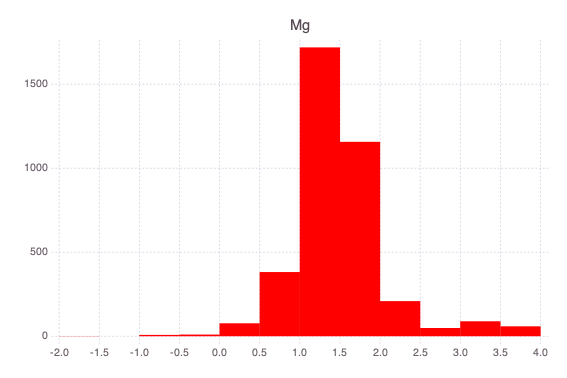

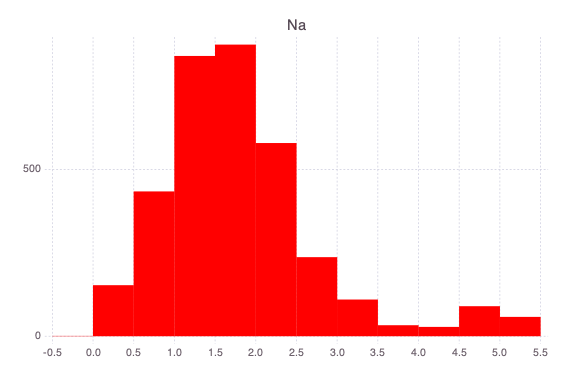

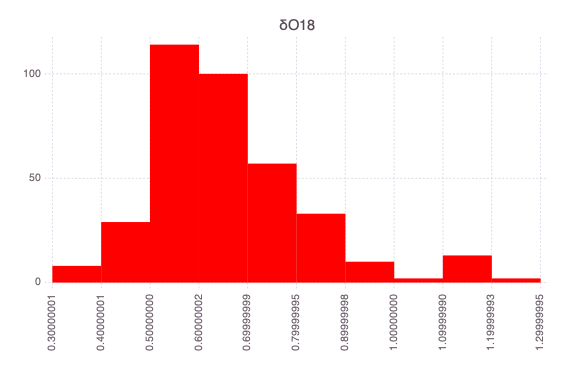

Li: Min -3.9586072 Max 2.9867718 StdDev 1.4681796 Skewness 0.6889145 Count 551
Mg: Min -2.0 Max 3.929419 StdDev 0.5826601 Skewness 1.142913 Count 3760
Na: Min -0.30103 Max 5.20412 StdDev 0.985548 Skewness 1.3556563 Count 3437


┌ Info: Mg: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51
┌ Info: Na: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51
┌ Info: δO18: log10-transformed
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:51


δO18: Min 0.33243838 Max 1.2137833 StdDev 0.16311567 Skewness 1.1355046 Count 368
Name Min Max StdDev Count (non-NaN's)
Temperature -1.0 2.4166405 0.19028741 -0.5570712 5214
Quartz -50.870045 222.28357 26.329222 0.24256101 3460
Chalcedony -81.64773 208.67426 27.450817 0.3369881 3460
pH 3.4 10.2 0.44822767 -0.45681924 3941
TDS 2.0863597 5.5171957 0.8672777 1.4807001 312
Al -4.3979397 0.09725732 0.8454361 -0.37494856 221
B -3.30103 1.8836614 0.77384454 0.08153698 2284
Ba -2.69897 0.6532125 0.40884706 -0.013896148 310
Be -4.273001 -1.8860567 0.46150032 -0.83869493 244
Br -3.0 1.9242793 1.0616237 0.5956521 621
Ca -0.22184873 3.4093695 0.43120933 0.5738154 3772
Cl -0.22184873 5.3802114 1.0519629 1.1927316 3923
HCO3 1.5682018 3.9645896 0.22752158 0.051133487 915
K -2.0 4.1139436 0.8480291 1.8444492 3177
Li -3.9586072 2.9867718 1.4681796 0.6889145 551
Mg -2.0 3.929419 0.5826601 1.142913 3760
Na -0.30103 5.20412 0.985548 1.3556563 3437
δO18 0.33243838 1.2137833 0.16311567 1.1355046 368


┌ Info: Attributes
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPreprocess.jl:70


In [13]:
NMFk.datanalytics(X, attributes; dims=2, logv=logv);

## Normalize the data

In [14]:
Xnl, xlmin, xlmax, zflag = NMFk.normalizematrix_col(X; logv=logv);

## Define the number of signatures to be explored

In [15]:
nkrange = 2:10

2:10

## Define a directory where outputs should be stored

In [16]:
resultdir = "utah/results";

## Define the number of NMF iterations (NMF random initial guess runs):

In [17]:
nruns = 100;

## Run NMFk on normalized data

In [18]:
# W, H, fitquality, robustness, aic, kopt = NMFk.execute(Xnl, nkrange, nruns; cutoff=0.3, resultdir=resultdir, casefilename="nmfk-nl", load=true)
W, H, fitquality, robustness, aic, kopt = NMFk.load(nkrange, nruns; cutoff=0.3, resultdir=resultdir, casefilename="nmfk-nl");

Signals:  2 Fit:      186.979 Silhouette:    0.5600511 AIC:    -193490.6 Signal order: [1, 2]
Signals:  3 Fit:     116.1197 Silhouette:    0.3400365 AIC:    -202059.3 Signal order: [1, 2, 3]
Signals:  4 Fit:     81.67226 Silhouette: -0.004722083 AIC:      -205653 Signal order: [1, 2, 3, 4]
Signals:  5 Fit:     55.85581 Silhouette:   0.03561851 AIC:    -210367.2 Signal order: [1, 2, 3, 4, 5]
Signals:  6 Fit:     37.37445 Silhouette:   0.08498218 AIC:    -215954.6 Signal order: [1, 2, 3, 4, 5, 6]
Signals:  7 Fit:     22.77074 Silhouette:  -0.06623857 AIC:    -225288.2 Signal order: [1, 2, 3, 4, 5, 6, 7]
Signals:  8 Fit:     14.94362 Silhouette:    0.0637157 AIC:    -231651.2 Signal order: [1, 2, 3, 4, 5, 6, 7, 8]
Signals:  9 Fit:     9.241436 Silhouette:   -0.1125796 AIC:    -240388.3 Signal order: [1, 2, 3, 4, 5, 6, 7, 8, 9]
Signals: 10 Fit:     6.104004 Silhouette:  -0.01305462 AIC:      -246494 Signal order: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


┌ Info: Optimal solution: 3 signals
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkIO.jl:30


## Get the acceptable solutions within the present range of number of signatures:

In [19]:
NMFk.getks(nkrange, robustness[nkrange], 0.3)

2-element Vector{Int64}:
 2
 3

## Get the optimal number of signatures:

In [20]:
NMFk.getk(nkrange, robustness[nkrange], 0.3)

3

## Plot the fit and robustness of the solution

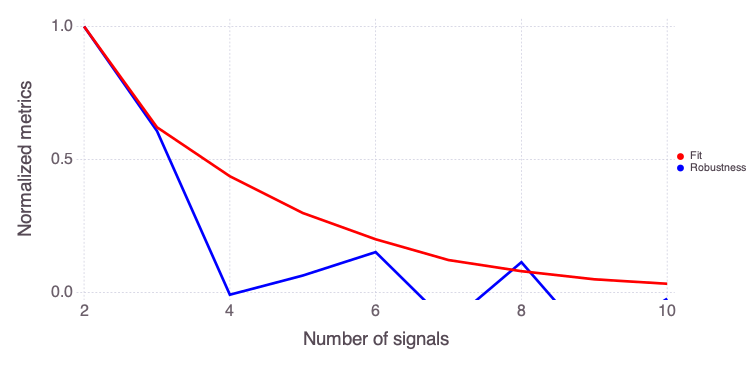

In [21]:
resultdirpost = "utah/results-postprocessing-nl-$(nruns)"
figuredirpost = "utah/figures-postprocessing-nl-$(nruns)"
NMFk.plot_feature_selecton(nkrange, fitquality, robustness; figuredir=figuredirpost)

## Analysis of the optimal solution

┌ Info: Number of signals: 3
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:205
┌ Info: Attributes (signals=3)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:209
┌ Warning: type Clustering.KmeansResult{Core.Array{Core.Float32,2},Core.Float32,Core.Int64} not present in workspace; reconstructing
└ @ JLD /Users/vvv/.julia/packages/JLD/JHrZe/src/jld_types.jl:697
┌ Info: Robust k-means analysis results are loaded from file utah/results-postprocessing-nl-100/Hmatrix-3-3_18-1000.jld!
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkCluster.jl:67


6×2 Matrix{Any}:
 "pH"           1.0
 "Temperature"  0.858848
 "Ba"           0.84477
 "Mg"           0.788068
 "Ca"           0.76783
 "HCO3"         0.549396

9×2 Matrix{Any}:
 "δO18"        1.0
 "Cl"          0.651079
 "Na"          0.643991
 "Br"          0.642053
 "Quartz"      0.620207
 "Chalcedony"  0.596872
 "B"           0.586983
 "K"           0.475275
 "Li"          0.414782

3×2 Matrix{Any}:
 "Be"   1.0
 "Al"   0.672723
 "TDS"  0.332944

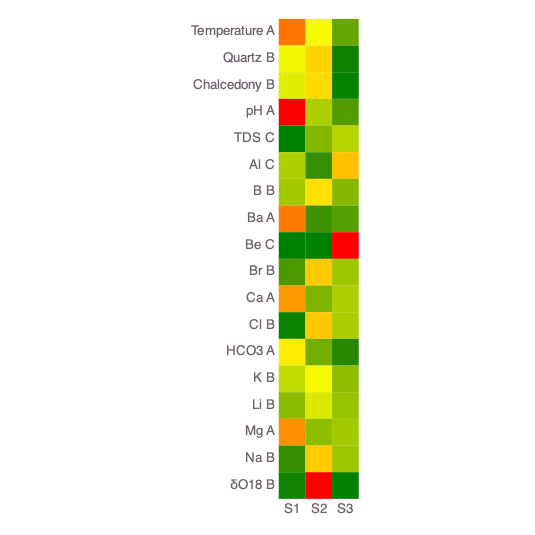

┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkCluster.jl:158
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkCluster.jl:158
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkCluster.jl:158
┌ Warning: type Clustering.KmeansResult{Core.Array{Core.Float32,2},Core.Float32,Core.Int64} not present in workspace; reconstructing
└ @ JLD /Users/vvv/.julia/packages/JLD/JHrZe/src/jld_types.jl:697
┌ Info: Robust k-means analysis results are loaded from file utah/results-postprocessing-nl-100/Wmatrix-3-3_5218-1000.jld!
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkCluster.jl:67
┌ Warning: Procedure to find unique signals could not identify a solution ...
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkCluster.jl:158
┌ Warning: Procedure to find unique signals could not identify a solutio

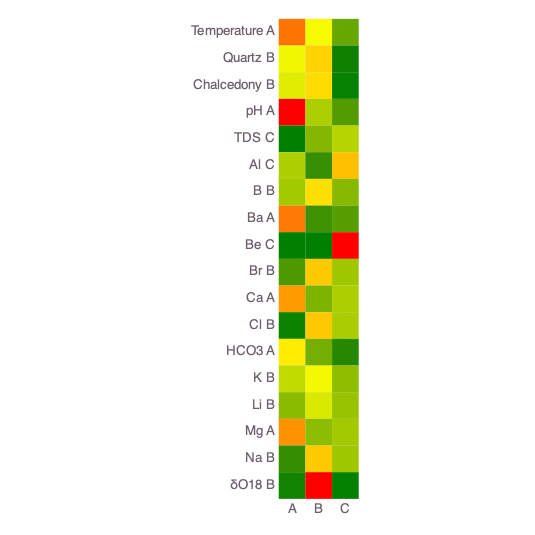

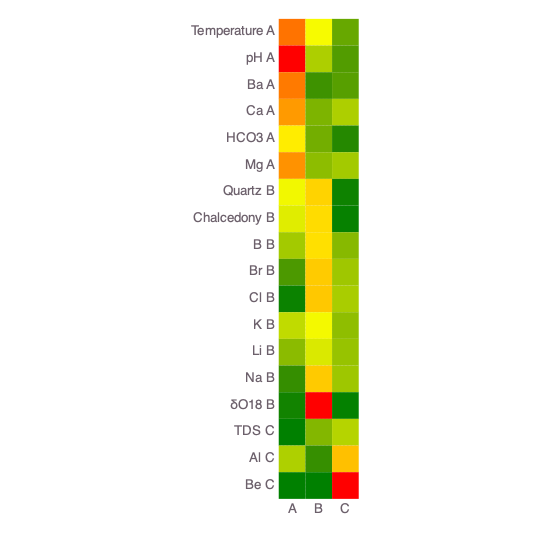

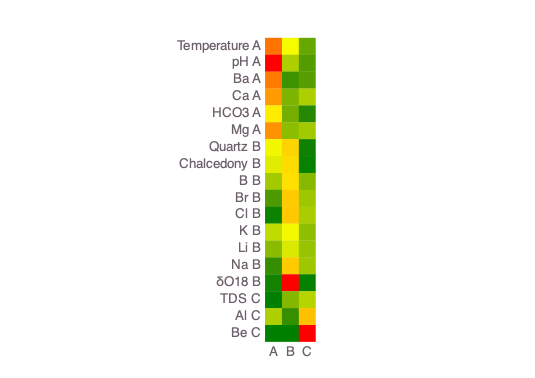

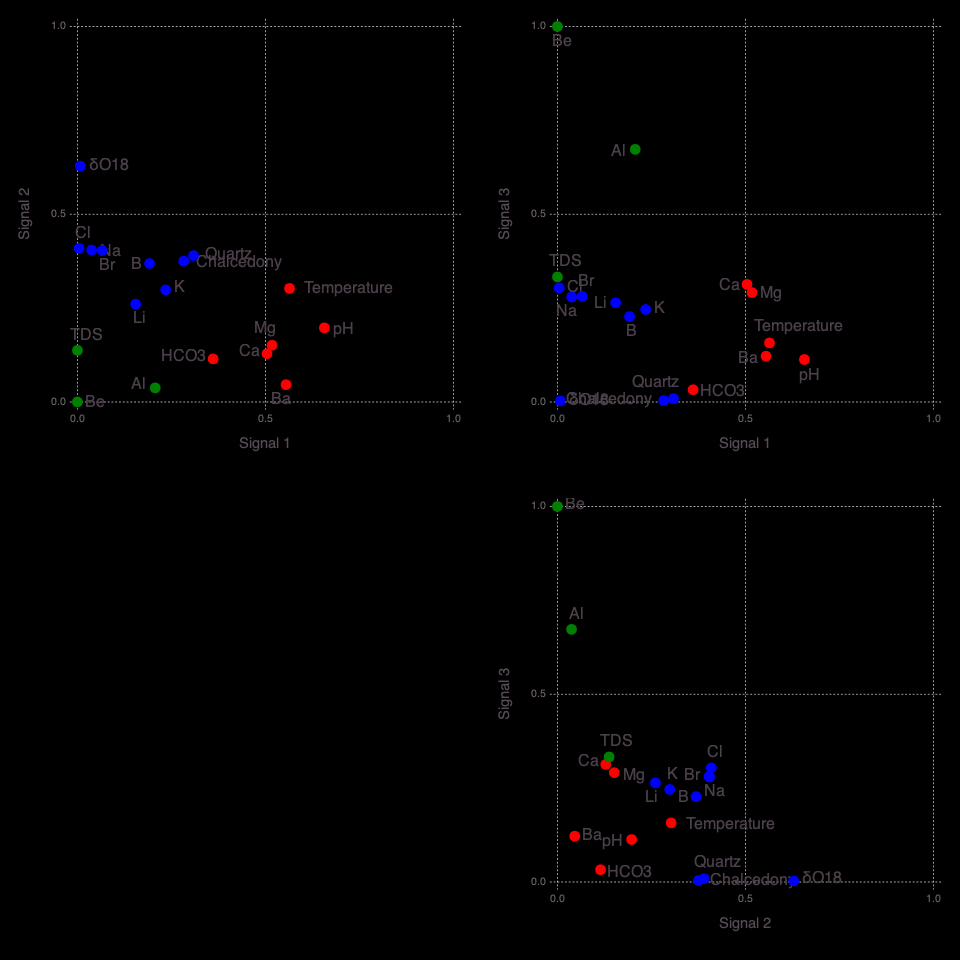

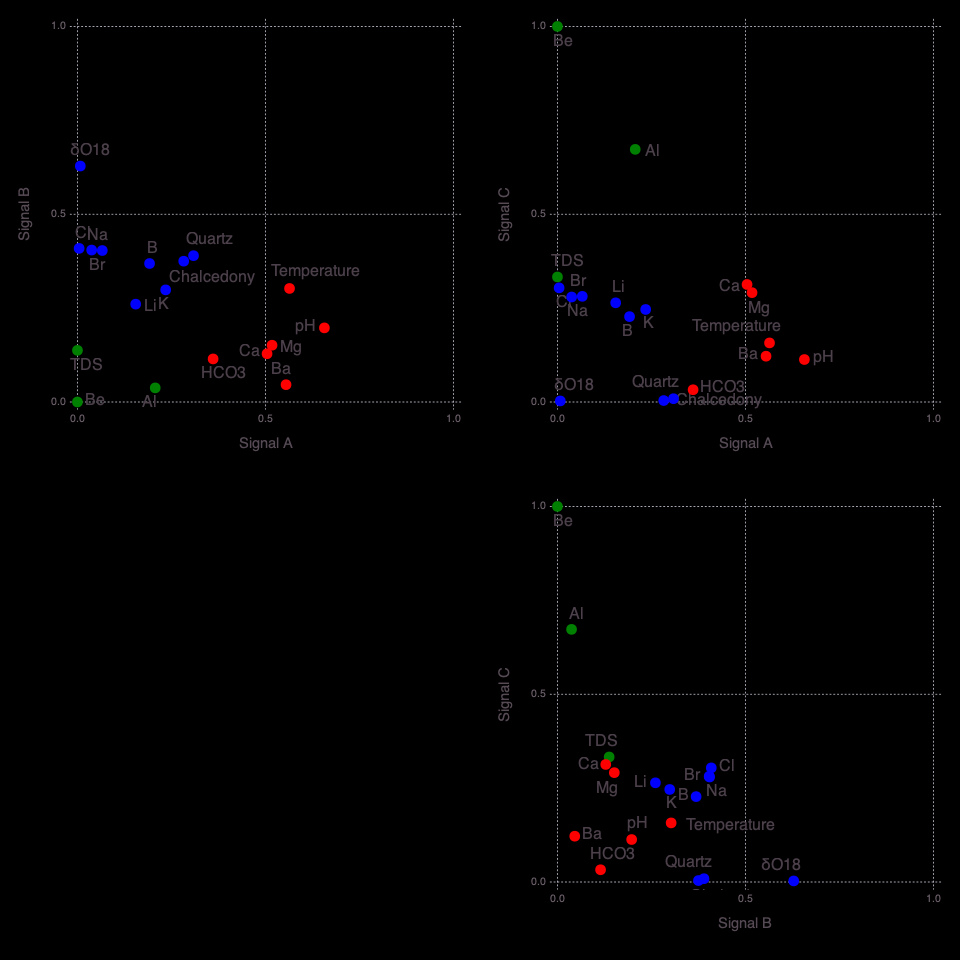

2131×2 Matrix{Any}:
 "4816"  1.0
 "4655"  0.970208
 "4826"  0.958804
 "2260"  0.955817
 "4015"  0.938536
 "3257"  0.93743
 "4889"  0.929527
 "1797"  0.924136
 "3405"  0.924069
 "2566"  0.905143
 ⋮       
 "350"   0.492666
 "341"   0.491852
 "2730"  0.487104
 "3987"  0.47064
 "483"   0.466211
 "2909"  0.464978
 "476"   0.46367
 "2931"  0.435235
 "452"   0.359449

1966×2 Matrix{Any}:
 "4430"  1.0
 "2992"  0.972819
 "2309"  0.920633
 "4913"  0.90427
 "4056"  0.88218
 "564"   0.868838
 "4978"  0.866204
 "4319"  0.857647
 "4788"  0.855117
 "2468"  0.831267
 ⋮       
 "375"   0.203084
 "159"   0.202853
 "3798"  0.198906
 "5112"  0.1978
 "738"   0.19415
 "3317"  0.193811
 "747"   0.189873
 "10"    0.181605
 "4954"  0.163099

1121×2 Matrix{Any}:
 "5013"  1.0
 "5118"  0.985958
 "5064"  0.978501
 "5068"  0.974911
 "5126"  0.969774
 "2554"  0.952582
 "5049"  0.948387
 "5048"  0.914722
 "5006"  0.910949
 "5095"  0.910366
 ⋮       
 "4154"  0.174466
 "4710"  0.174457
 "3376"  0.172963
 "1412"  0.170218
 "3662"  0.161509
 "4300"  0.160252
 "2742"  0.148677
 "4289"  0.144853
 "2028"  0.129906

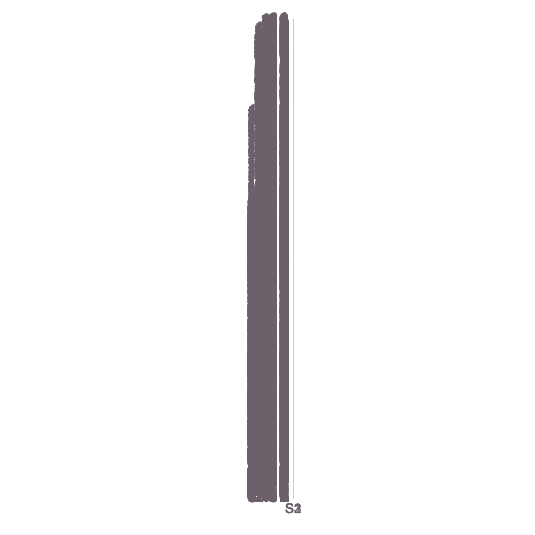

┌ Info: Locations (signals=3)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:391
┌ Info: Signal A (S1) Count: 2131
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:404
┌ Info: Signal B (S2) Count: 1966
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:404
┌ Info: Signal C (S3) Count: 1121
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:404
┌ Info: Signal A -> A Count: 2131
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:414
┌ Info: Signal B -> B Count: 1966
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:414
┌ Info: Signal C -> C Count: 1121
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:414
┌ Info: Signal A (remapped k-means clustering)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:429
┌ Info: Signal B (remapped k-means clustering)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl:429
┌ Info: Signal C (remapped k-means clustering)
└ @ NMFk /Users/vvv/.julia/dev/NMFk/src/NMFkPostprocess.jl

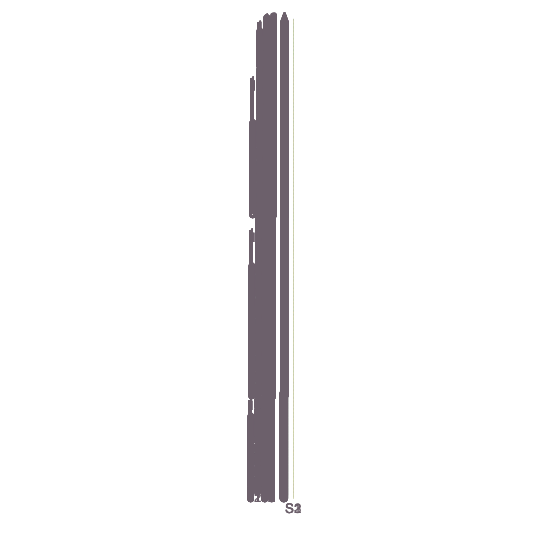

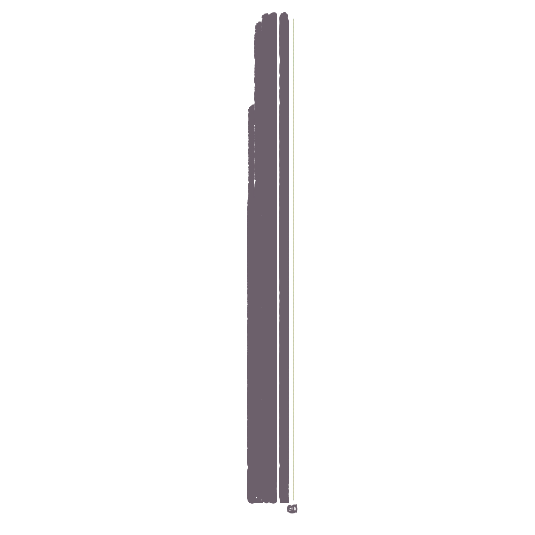

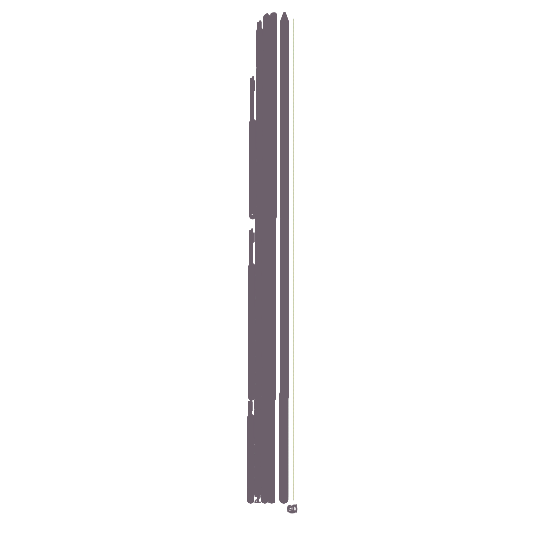

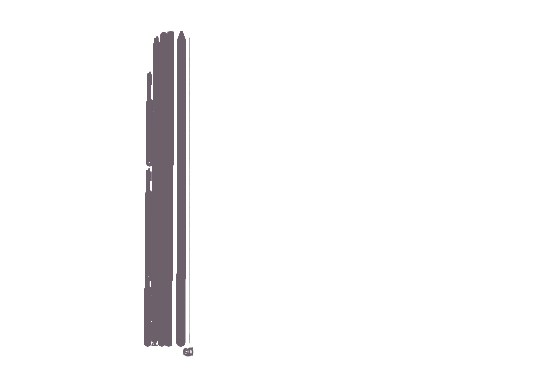

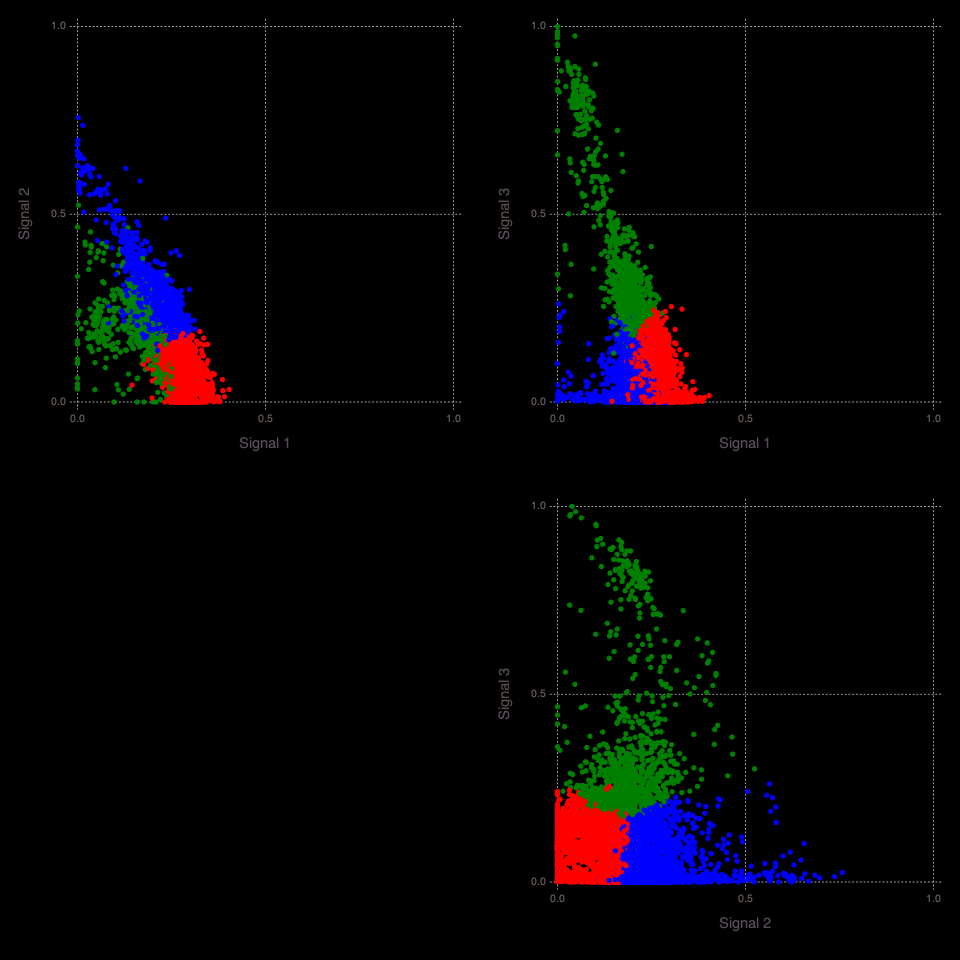

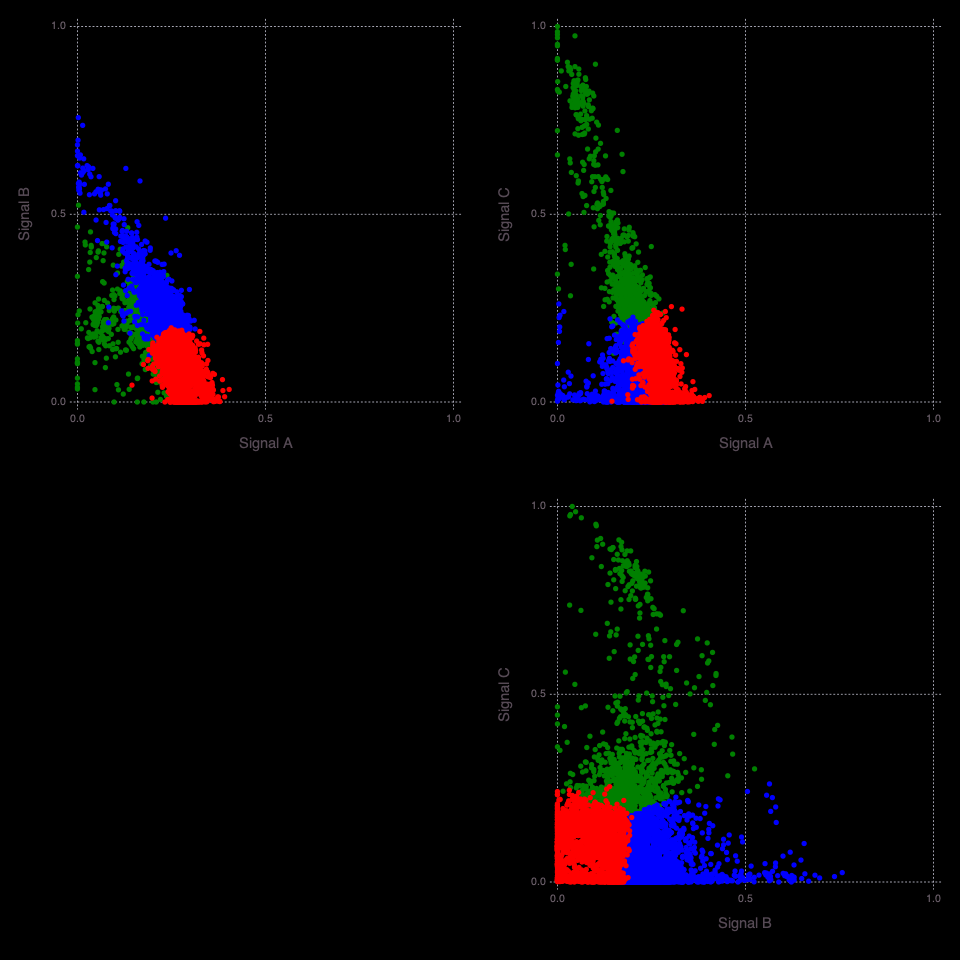

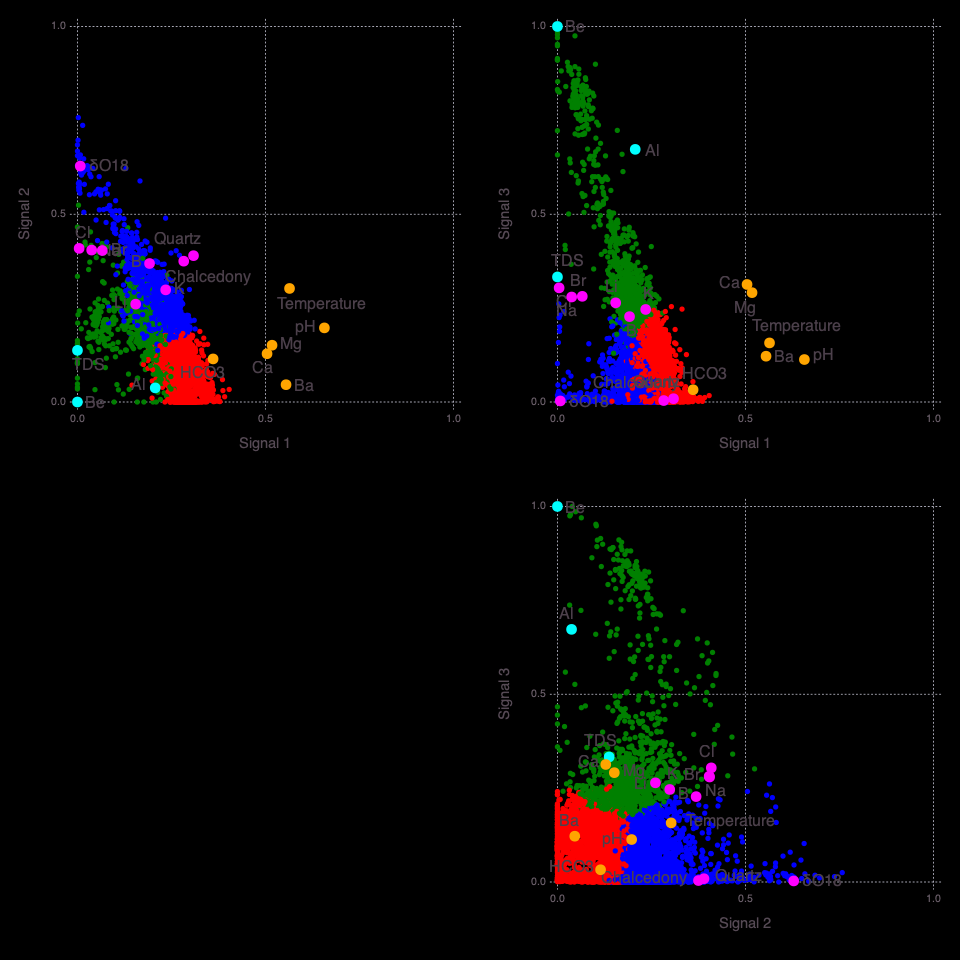

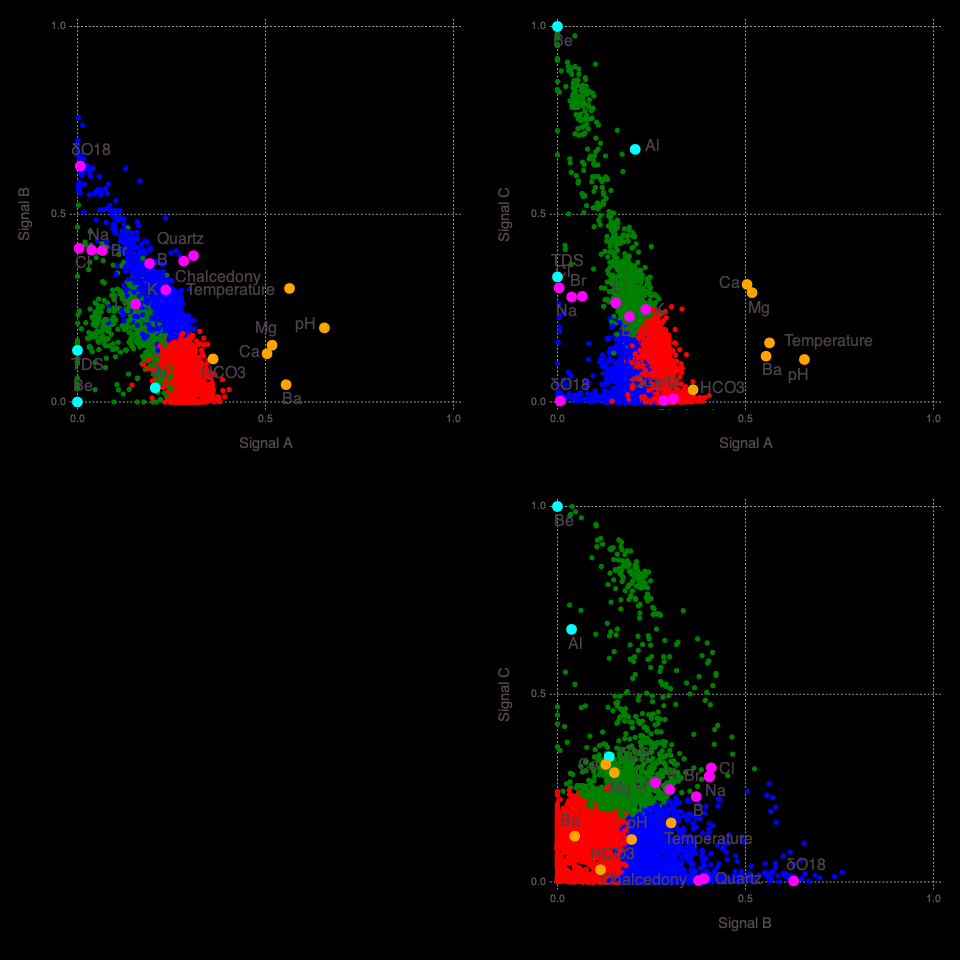

([[1, 2, 3]], [['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B'  …  'A', 'B', 'B', 'B', 'A', 'B', 'B', 'A', 'A', 'A']], [['A', 'B', 'B', 'A', 'C', 'C', 'B', 'A', 'C', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'B', 'B']])

In [22]:
Sorder, Wclusters, Hclusters = NMFk.clusterresults(NMFk.getk(nkrange, robustness[nkrange], 0.3), W, H, string.(collect(1:npoints)), attributes; lon=xcoord, lat=ycoord, resultdir=resultdirpost, figuredir=figuredirpost, ordersignal=:Wcount, Hcasefilename="attributes", Wcasefilename="locations", biplotcolor=:WH, sortmag=false, biplotlabel=:H, point_size_nolabel=2Gadfly.pt, point_size_label=4Gadfly.pt)

## Associations of the data attributes with the extracted signatures 

In [23]:
Mads.display("utah/results-postprocessing-nl-100/attributes-3-groups.txt")

Signal A (S1)
pH         	1.0
Temperature	0.859
Ba         	0.845
Mg         	0.788
Ca         	0.768
HCO3       	0.549

Signal B (S2)
δO18       	1.0
Cl         	0.651
Na         	0.644
Br         	0.642
Quartz     	0.62
Chalcedony 	0.597
B          	0.587
K          	0.475
Li         	0.415

Signal C (S3)
Be         	1.0
Al         	0.673
TDS        	0.333



## Associations of the data locations with the extracted signatures 

In [24]:
ldata, lhs = DelimitedFiles.readdlm("utah/results-postprocessing-nl-100/locations-3.csv", ',', header=true)
signallabels = unique(sort(ldata[:,end]))
zcolor = Vector{Int64}(undef, length(ldata[:,1]))
for i = 1:length(clusters)
	ci = ldata[:,end] .== signallabels[i]
	println("Signal $(signallabels[i])")
	si = sortperm(ldata[ci,2+i]; rev=true)
	display([ldata[ci,1:3] ldata[ci,3+i]][si,:][1:10,:])
	zcolor[ci] .= i
end

10×4 Matrix{Any}:
 4816  -112.863  41.9985  1.0
 4684  -112.352  41.9921  0.609925
 4826  -112.882  41.9907  0.958804
 4735  -112.512  41.9874  0.664952
 4739  -112.534  41.986   0.579875
 4664  -112.304  41.9847  0.60673
 2510  -111.424  41.9844  0.633779
 4830  -112.892  41.9796  0.797651
 4841  -112.916  41.9796  0.849636
 4851  -112.931  41.9794  0.796321

10×4 Matrix{Any}:
 4330  -112.221  41.298   0.256844
 4336  -112.222  41.301   0.287342
 5047  -113.776  40.7324  0.284777
 1428  -111.769  40.123   0.255764
 1278  -111.732  40.0933  0.261085
 1011  -111.62   40.133   0.263974
 4062  -113.198  38.1853  0.395614
 1436  -111.769  40.1366  0.291657
 1144  -111.698  40.078   0.304277
 2586  -112.063  40.2983  0.244356

10×4 Matrix{Any}:
 4977  -113.607  40.841   0.301232
 4563  -112.277  41.6733  0.340562
 5103  -113.794  40.8641  0.385976
 4801  -113.228  40.8558  0.282822
 4959  -113.581  40.7563  0.417108
 5019  -113.734  40.781   0.555066
 5109  -113.83   40.7844  0.549928
 4909  -113.476  40.7352  0.406015
 4802  -113.228  40.856   0.366626
 5129  -113.888  40.7569  0.523086

Signal A
Signal B
Signal C


pslegend [WARNING]: Representation of font type not recognized. Using default.


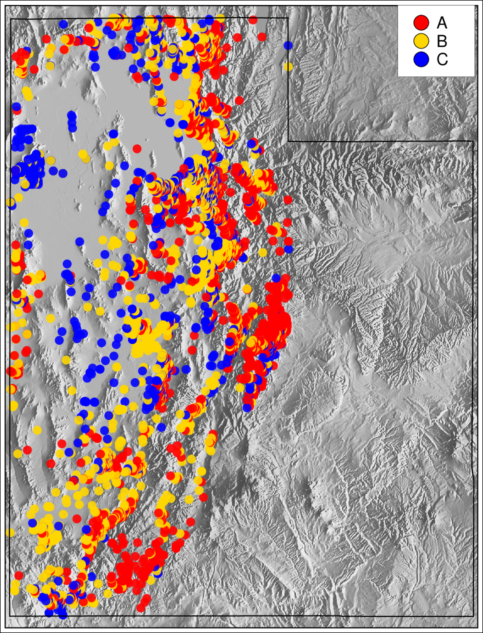

In [25]:
GMT.grdimage("utah/maps/utah.nc", shade=(azimuth=100, norm="e0.8"), proj=:Mercator,
    color=GMT.makecpt(color=:grayC, transparency=10, range=(0,5000,500), continuous=true),
    figsize=8, conf=(MAP_FRAME_TYPE="plain", MAP_GRID_PEN_PRIMARY="thinnest,gray,.", MAP_GRID_CROSS_SIZE_SECONDARY=0.1, MAP_FRAME_PEN=0.5, MAP_TICK_PEN_PRIMARY=0.1, MAP_TICK_LENGTH_PRIMARY=0.01, FORMAT_GEO_MAP="ddd", FONT_ANNOT_PRIMARY=0.1, FONT_ANNOT_SECONDARY=0.1), frame=(axis="lrtb"))
GMT.legend!(box=(pen=false, fill=:white),
            pos=(inside=true, anchor=:T, width=1.30, justify=:CM, offset=(-0.7, -0.6)),
            GMT.text_record([
                "S 0.10i c 0.10i red  0.25p 0.2i A"
                "S 0.10i c 0.10i gold 0.25p 0.2i B"
                "S 0.10i c 0.10i blue 0.25p 0.2i C"]),
            par=(:FONT_ANNOT_PRIMARY, "8p,Arial"))
GMT.scatter!(ldata[:,2], ldata[:,3], marker=:c, markersize=:0.15,
    color=(:red, :gold, :blue), zcolor=zcolor, alpha=10,
    coast=(proj=:Mercator, 
    DCW=(country="US.UT", pen=(0.5,:black))),
    fmt=:png, savefig="utah/maps/signatures-3")
Images.load("utah/maps/signatures-3.png")

## Spatial distribution of the extracted geothermal features (signals)

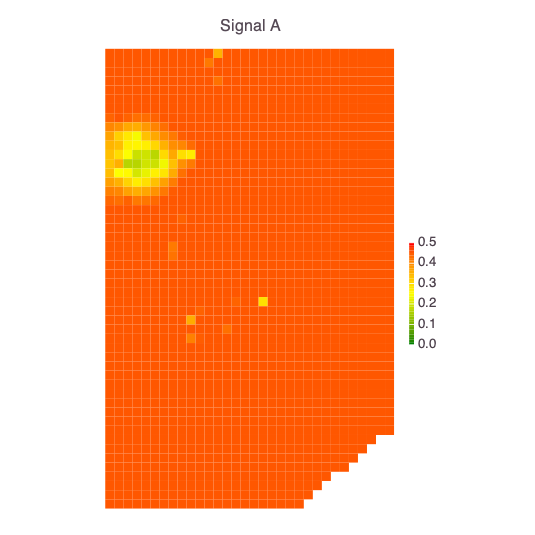

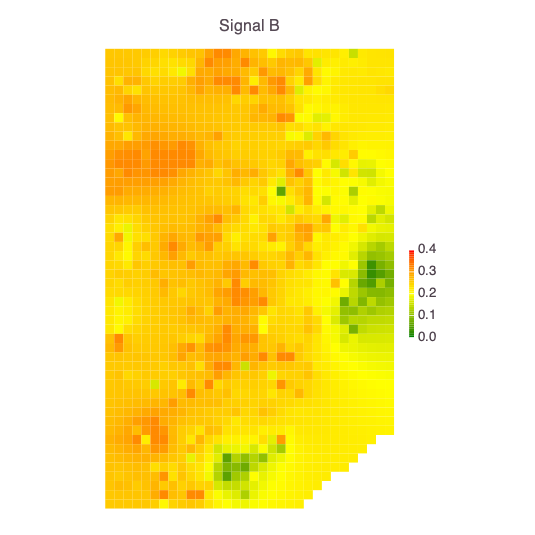

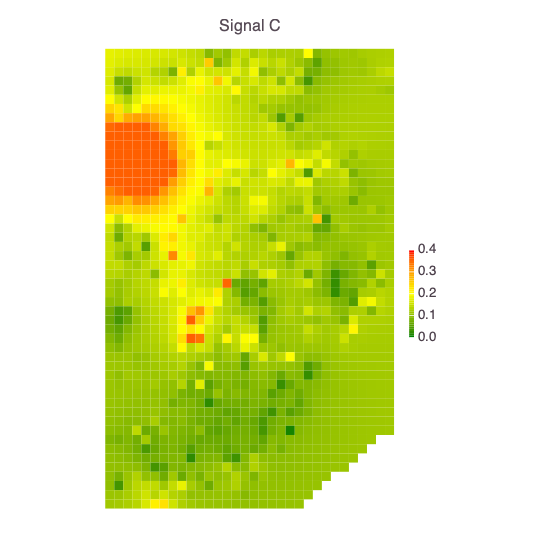

In [26]:
for i in Sorder[1]
	inversedistancefield = Array{Float64}(undef, length(xgrid), length(ygrid))
	v = W[kopt][:,i] ./ maximum(W[kopt][:,i])
	iz = .!isnan.(v)
	icoord = coord[:,iz]
	v = v[iz]
	for (i, x) in enumerate(xgrid), (j, y) in enumerate(ygrid)
			inversedistancefield[i, j] = Kriging.inversedistance(permutedims([x y]), icoord, v, 2; cutoff=1000)[1]
	end
	imax = NMFk.maximumnan(inversedistancefield)
	imin = NMFk.minimumnan(inversedistancefield)
	NMFk.plotmatrix(rotl90(inversedistancefield); quiet=false, filename="utah/maps/Signal_$(signallabels[i])_map_inversedistance_prediction.png", title="Signal $(signallabels[i])", maxvalue=imin + (imax - imin)/ 2)
end

## Map of NMFk predicted geothermal attributes

Our ML "fills in" the gaps in our knowledge:

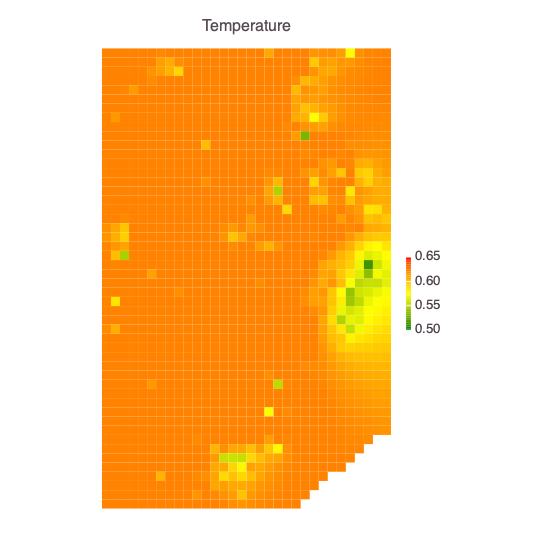

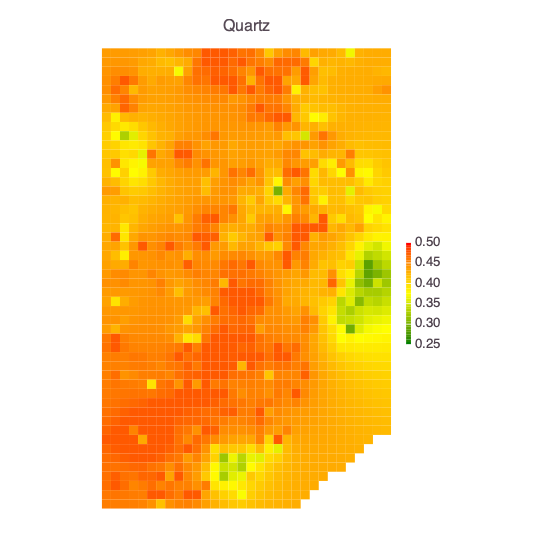

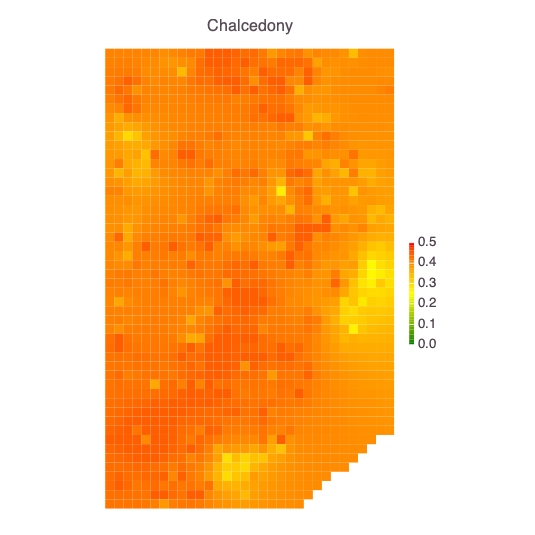

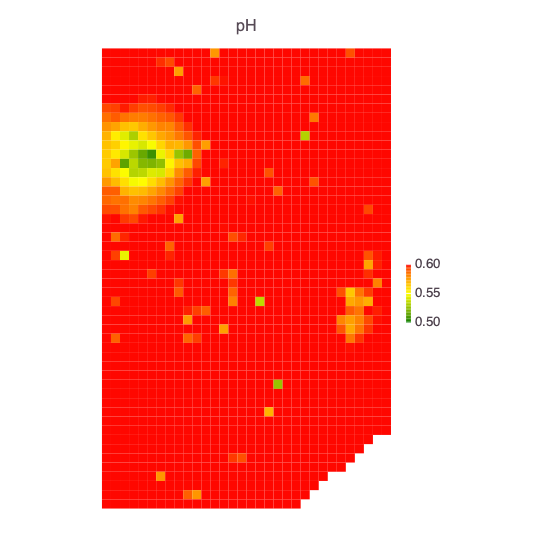

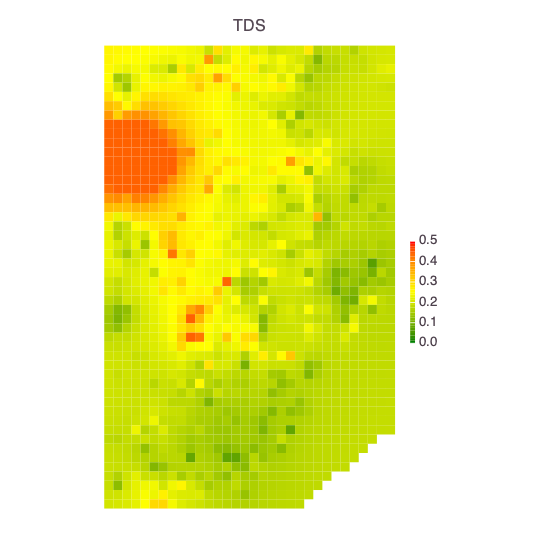

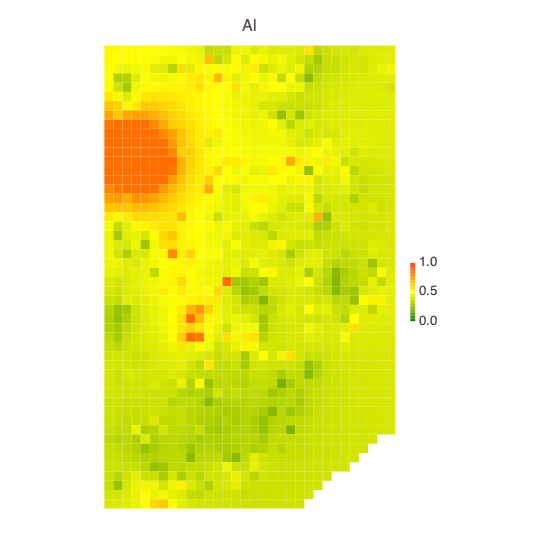

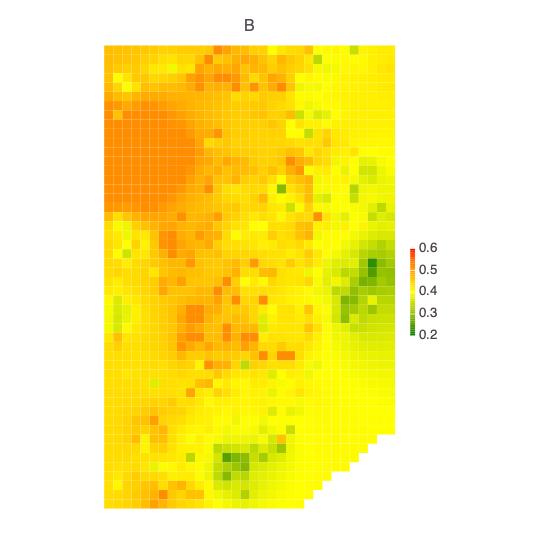

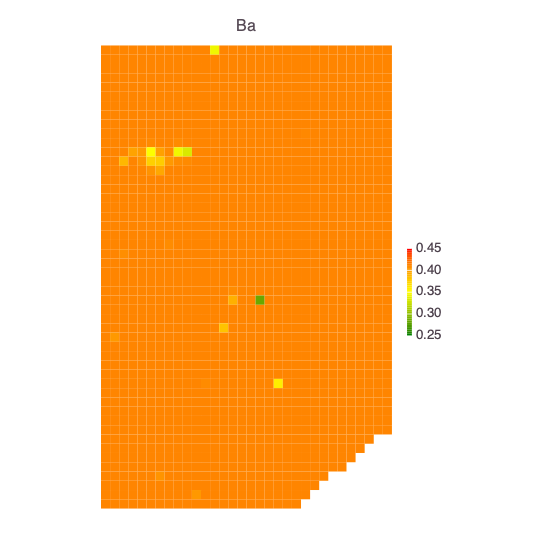

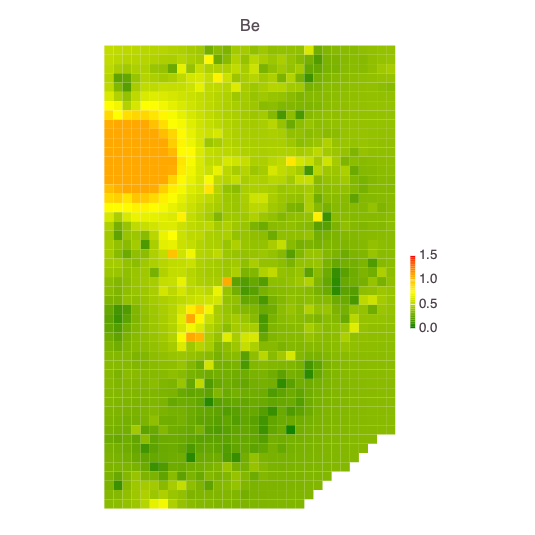

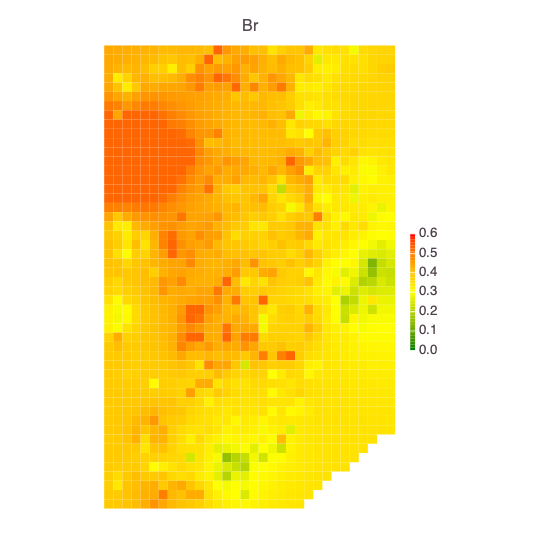

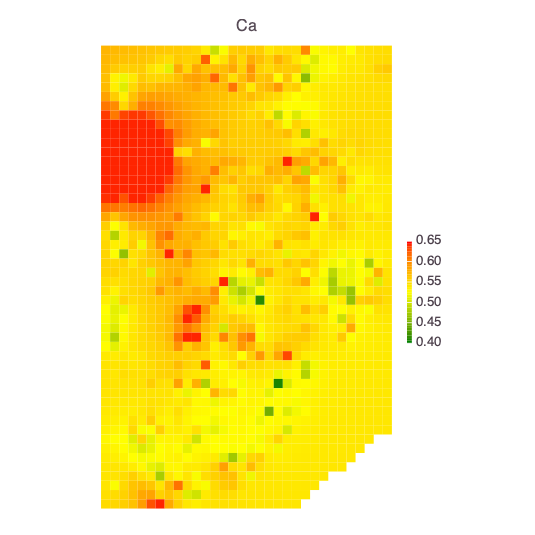

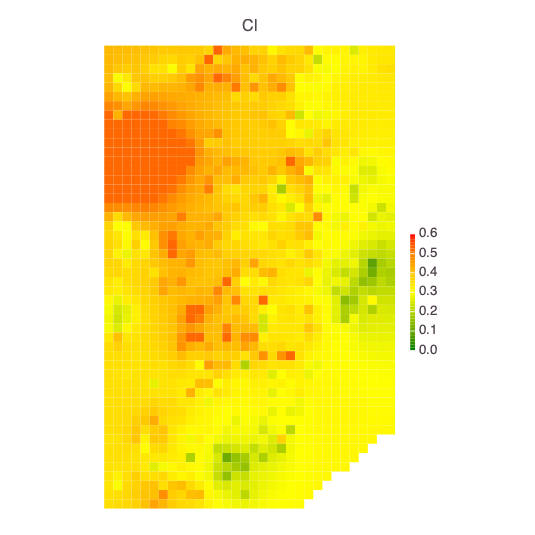

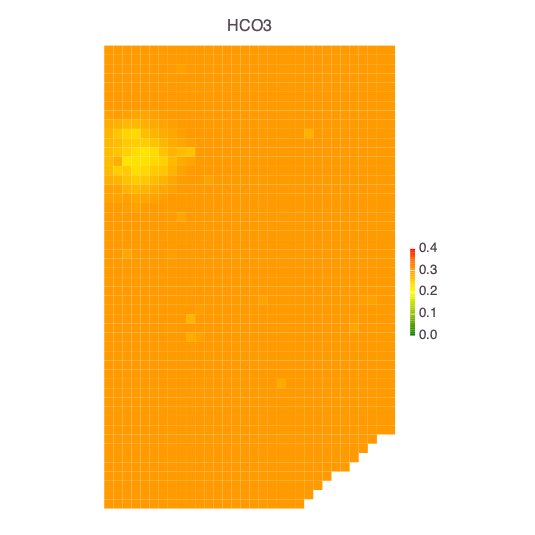

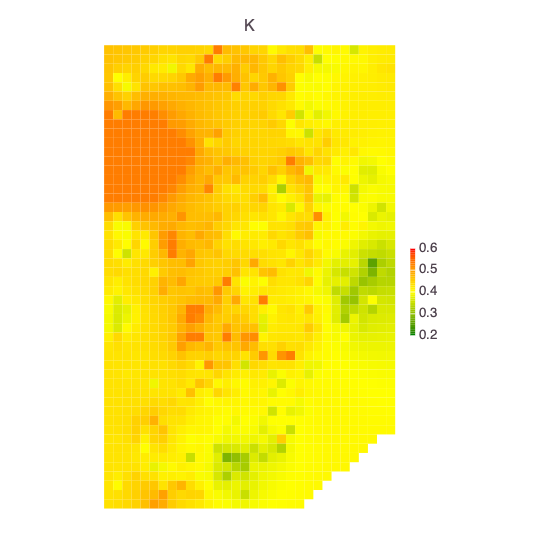

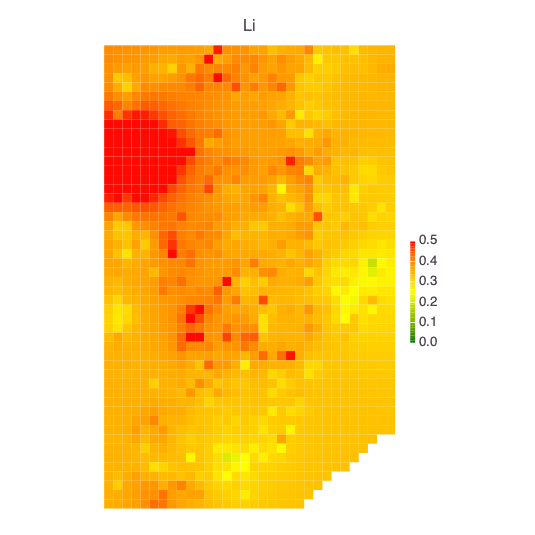

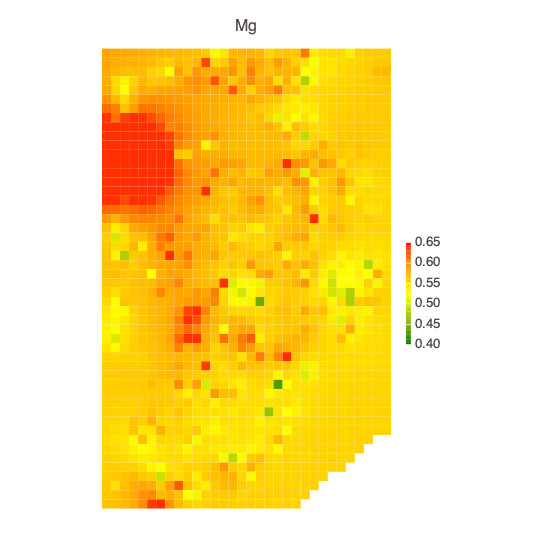

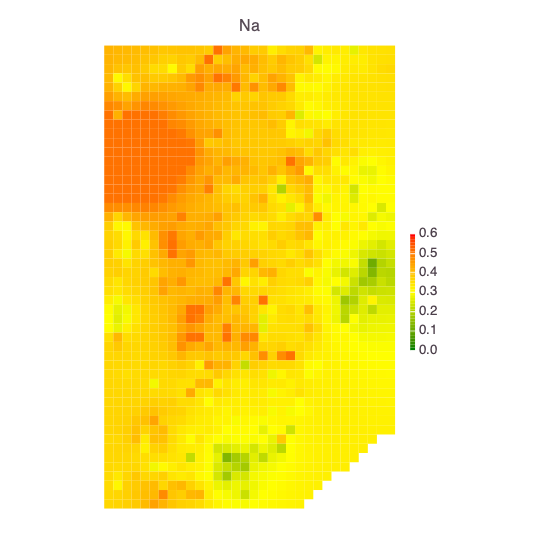

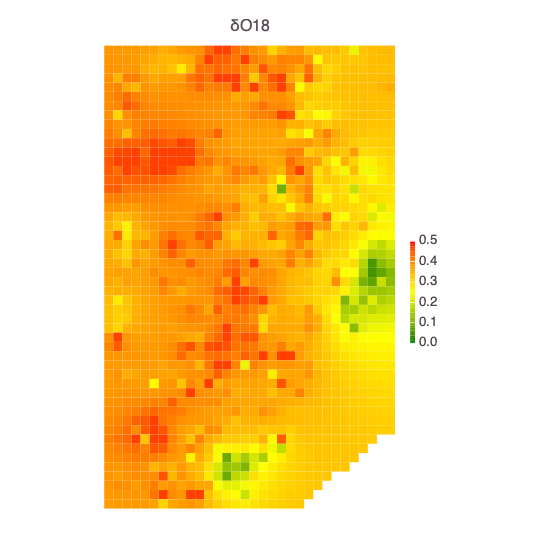

In [27]:
Xe = W[kopt]  * H[kopt]

for i = 1:nattributes
		inversedistancefield = Array{Float64}(undef, length(xgrid), length(ygrid))
		v = Xe[:,i]
		iz = .!isnan.(v)
		icoord = coord[:,iz]
		v = v[iz]
		for (i, x) in enumerate(xgrid), (j, y) in enumerate(ygrid)
				inversedistancefield[i, j] = Kriging.inversedistance(permutedims([x y]), icoord, v, 2; cutoff=1000)[1]
		end
		imax = NMFk.maximumnan(inversedistancefield)
		imin = NMFk.minimumnan(inversedistancefield)
		NMFk.plotmatrix(rotl90(inversedistancefield); quiet=false, filename="utah/maps/Attribute_$(attributes[i])_map_inversedistance_prediction.png", title="$(attributes[i])", maxvalue=imin + (imax - imin)/ 2)
end